<div style=" background-color: RGB(190, 29, 88);" >
<h1 style="margin: auto; padding: 20px 0; color:white; text-align: center">PROJET 3 - AI ENGINEER</h1>
<h2 style="margin: auto; padding: 20px 0; color:white; text-align: center">Préparez des données pour un organisme de santé publique</h2>
</div>

<h3 style="margin: auto; padding: 20px; color: RGB(25, 62, 144); ">Objectifs de l'analyse</h3>

L'agence Santé publique France souhaite <b>améliorer sa base de données Open Food Facts</b>.

Cette base de données open source est mise à la disposition de particuliers et d’organisations afin de leur permettre de connaître la qualité nutritionnelle de produits. 

Aujourd’hui, pour ajouter un produit à la base de données d'Open Food Facts, il est nécessaire de remplir de nombreux champs textuels et numériques, ce qui peut conduire à des erreurs de saisie et à des valeurs manquantes dans la base. 

L’agence Santé publique France souhaite la création d’un système de suggestion ou d’auto-complétion pour aider les usagers à remplir plus efficacement la base de données.

https://world.openfoodfacts.org/data/data-fields.txt

<div style="background-color: RGB(25, 62, 144); text-align: center;" >
<h2 style="margin: auto; padding: 20px; color: white">Partie 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(190, 29, 88);" >
<h3 style="margin: auto; padding: 20px; color: RGB(190, 29, 88); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
# Librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Fonction
import functions as fcn

# Suppression des warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<div style="border: 1px solid RGB(190, 29, 88);" >
<h3 style="margin: auto; padding: 20px; color: RGB(190, 29, 88); ">1.2 - Chargement du fichier Excel</h3>
</div>

In [2]:
# Importation du fichier Excel
df = pd.read_csv(r"data\fr.openfoodfacts.org.products.csv", sep="\t", low_memory=False)

In [3]:
# Conservation du dataframe d'origine
df_original = df

<div style="background-color: RGB(25, 62, 144); text-align: center;" >
<h2 style="margin: auto; padding: 20px; color: white">Partie 2 - Analyse exploratoire du dataframe</h2>
</div>

<div style="border: 1px solid RGB(190, 29, 88);" >
<h3 style="margin: auto; padding: 20px; color: RGB(190, 29, 88); ">2.1 Présentation du jeu de données</h3>
</div>

In [4]:
# Affichage des dimensions du dataframe
fcn.display_dataset_dimensions(df)

Le tableau comporte 320772 observation(s) ou article(s).
Le tableau comporte 162 colonne(s).


In [5]:
# Affichage des 5 premières lignes
df.head()

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [6]:
# Affichage du % de valeurs manquantes pour chaque colonne
fcn.display_missing_values_percentage(df)

Pourcentage de valeurs manquantes par colonne :
last_modified_t                            0.000000
last_modified_datetime                     0.000000
creator                                    0.000623
created_t                                  0.000935
created_datetime                           0.002806
                                            ...    
ingredients_that_may_be_from_palm_oil    100.000000
ingredients_from_palm_oil                100.000000
no_nutriments                            100.000000
nervonic-acid_100g                       100.000000
water-hardness_100g                      100.000000
Length: 162, dtype: float64


In [7]:
df.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

<Axes: >

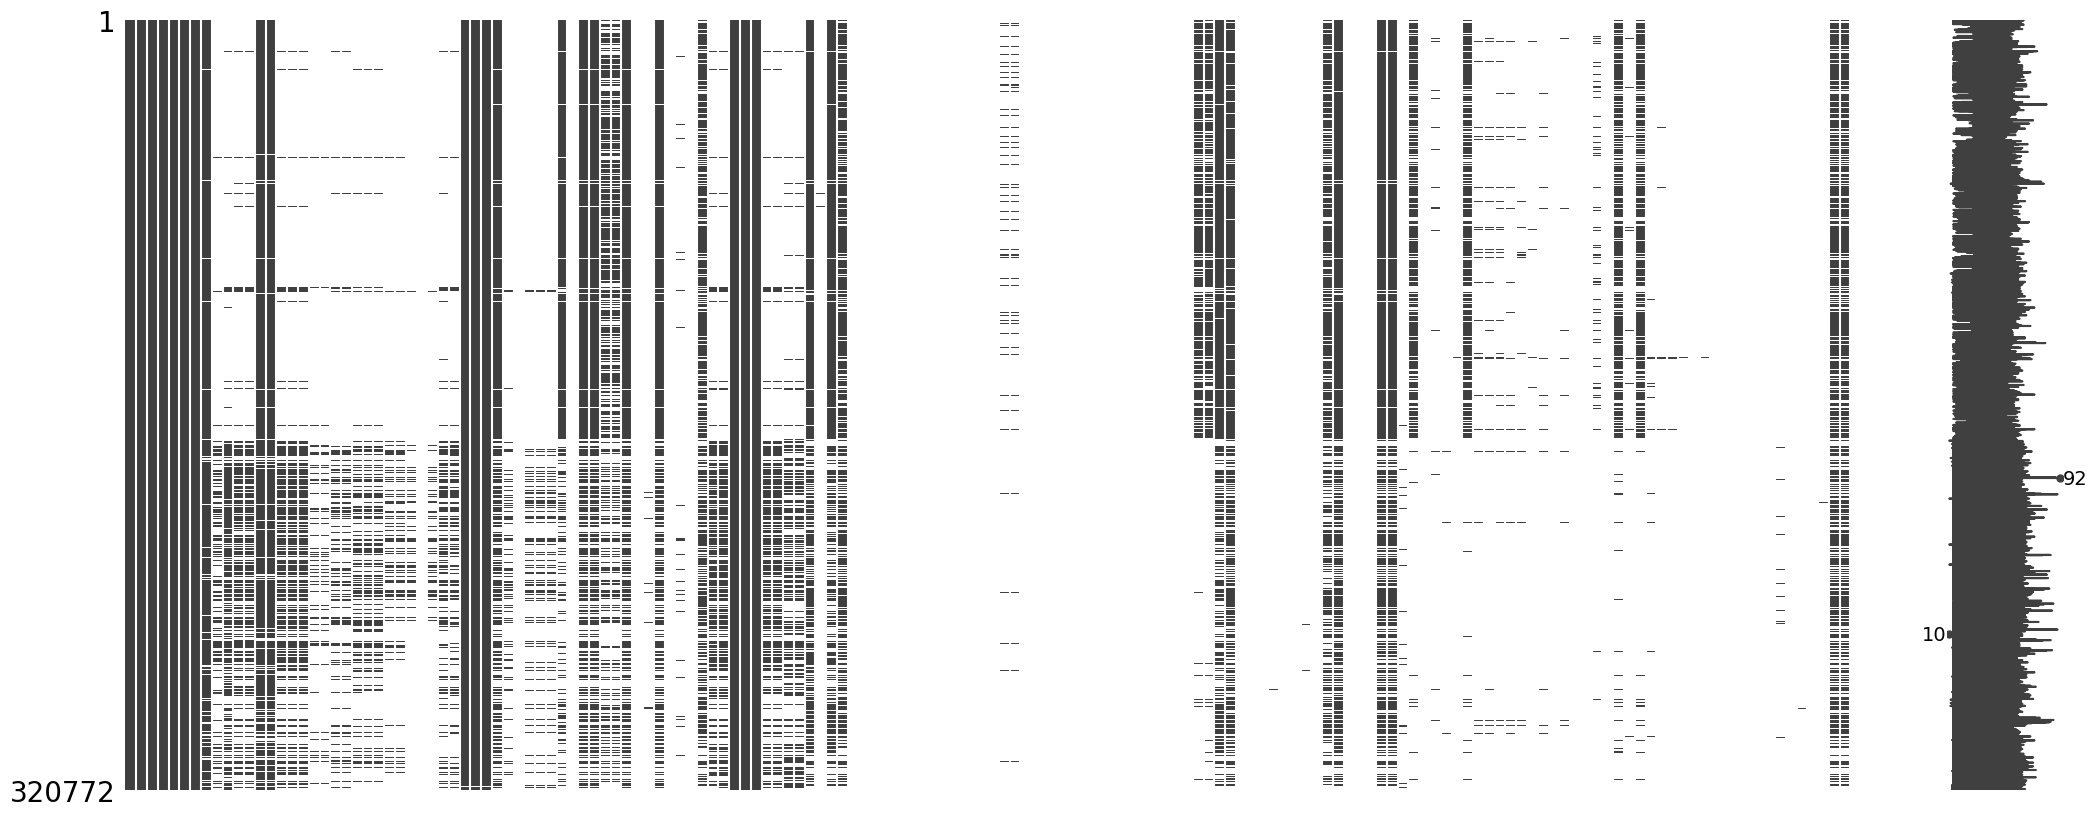

In [8]:
# Affichage graphique des valeurs manquantes pour chaque colonne
msno.matrix(df)

On constate déjà qu'il y a beaucoup de valeurs manquantes, même si cela reste illisible dans l'immédiat.

<div style="border: 1px solid RGB(190, 29, 88);" >
<h3 style="margin: auto; padding: 20px; color: RGB(190, 29, 88); ">2.2 Nettoyage du jeu de données</h3>
</div>

On va d'abord nettoyer le jeu de données avant de commencer l'analyse.

On va d'abord supprimer les colonnes peu remplies. On choisit un seuil à 50%, c'est-à-dire qu'on va supprimer les colonnes qui ont plus de 50% de valeurs manquantes.

In [9]:
# Suppression des colonnes avec plus de 50% de valeurs manquantes
df_cleaned = fcn.remove_columns_with_missing_values(df, 50)

On va maintenant retirer toutes les lignes dont aucune donnée nutritionnelle n'a été renseignée. Les données nutritionnelles ont leurs noms de colonnes terminant par "_100g".

In [10]:
# Suppression des lignes dont aucune donnée nutritionnelle n'a été renseignée
df_cleaned = fcn.remove_rows_with_all_100g_columns_empty(df_cleaned)

On va maintenant retirer toutes les lignes dont le code ou le nom du produit ("code_product") n'est pas renseigné.

In [11]:
# Suppression des lignes dont le code ou le nom du produit n'est pas renseignée
df_cleaned = fcn.remove_rows_where_column_is_null(df_cleaned, "code")
df_cleaned = fcn.remove_rows_where_column_is_null(df_cleaned, "product_name")

On vérifie si il y a des doublons au niveau du code du produit.

In [12]:
# Vérification des doublons pour la colonne "code"
df_cleaned[df_cleaned.duplicated("code")]

Empty DataFrame
Columns: [code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, brands, brands_tags, countries, countries_tags, countries_fr, ingredients_text, serving_size, additives_n, additives, ingredients_from_palm_oil_n, ingredients_that_may_be_from_palm_oil_n, nutrition_grade_fr, states, states_tags, states_fr, energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, nutrition-score-fr_100g, nutrition-score-uk_100g]
Index: []

[0 rows x 34 columns]

Il n'y a aucun doublon sur le code du produit.

In [13]:
# Affichage des dimensions du dataframe
fcn.display_dataset_dimensions(df_cleaned)

Le tableau comporte 259380 observation(s) ou article(s).
Le tableau comporte 34 colonne(s).


In [14]:
# Affichage des 5 premières lignes
df_cleaned.head()

code                                                url  \
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   
5  0000000016100  http://world-fr.openfoodfacts.org/produit/0000...   

           creator   created_t      created_datetime last_modified_t  \
1  usda-ndb-import  1489069957  2017-03-09T14:32:37Z      1489069957   
2  usda-ndb-import  1489069957  2017-03-09T14:32:37Z      1489069957   
3  usda-ndb-import  1489055731  2017-03-09T10:35:31Z      1489055731   
4  usda-ndb-import  1489055653  2017-03-09T10:34:13Z      1489055653   
5  usda-ndb-import  1489055651  2017-03-09T10:34:11Z      1489055651   

  last_modified_datetime                       product_name          brands  \
1   2017-03-09T14:32:37Z     Banana Chips Sweetened (Whole)             NaN   
2   2017-03-09T14:32:37Z                            Peanuts  Torn & Glasser   
3   2017-03-09T10:35:31Z             Organic Salted Nut Mix       Grizzlies   
4   2017-03-09T10:34:13Z                    Organic Polenta  Bob's Red Mill   
5   2017-03-09T10:34:11Z  Breadshop Honey Gone Nuts Granola            Unfi   

      brands_tags  ... fat_100g saturated-fat_100g carbohydrates_100g  \
1             NaN  ...    28.57              28.57              64.29   
2    torn-glasser  ...    17.86               0.00              60.71   
3       grizzlies  ...    57.14               5.36              17.86   
4  bob-s-red-mill  ...     1.43                NaN              77.14   
5            unfi  ...    18.27               1.92              63.46   

  sugars_100g fiber_100g  proteins_100g salt_100g  sodium_100g  \
1       14.29        3.6           3.57   0.00000        0.000   
2       17.86        7.1          17.86   0.63500        0.250   
3        3.57        7.1          17.86   1.22428        0.482   
4         NaN        5.7           8.57       NaN          NaN   
5       11.54        7.7          13.46       NaN          NaN   

   nutrition-score-fr_100g nutrition-score-uk_100g  
1                     14.0                    14.0  
2                      0.0                     0.0  
3                     12.0                    12.0  
4                      NaN                     NaN  
5                      NaN                     NaN  

[5 rows x 34 columns]

<Axes: >

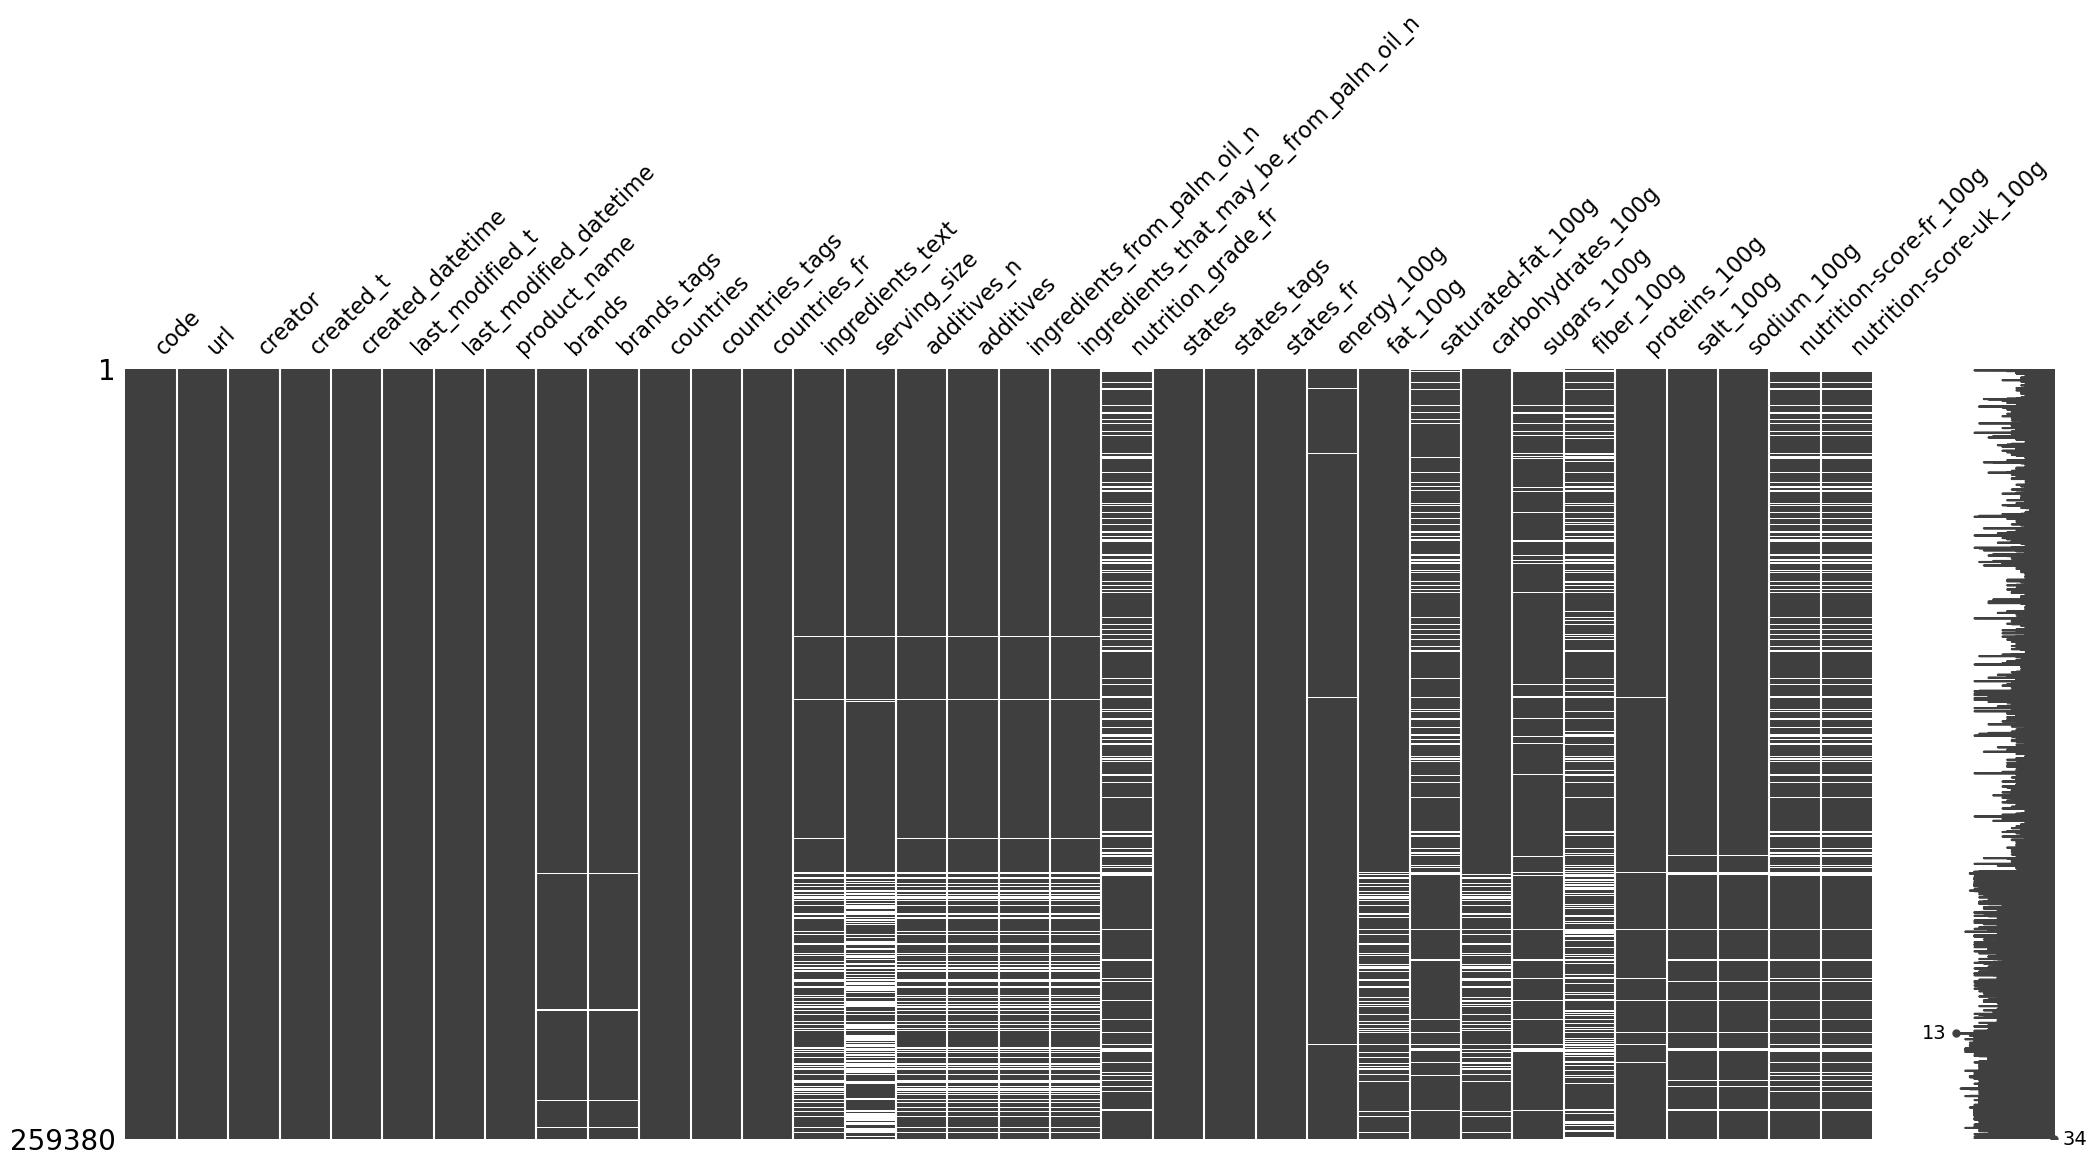

In [15]:
# Affichage graphique des valeurs manquantes pour chaque colonne
msno.matrix(df_cleaned)

<div style="border: 1px solid RGB(190, 29, 88);" >
<h3 style="margin: auto; padding: 20px; color: RGB(190, 29, 88); ">2.3 Sélection des features</h3>
</div>

On va séparer les variables en deux listes : une pour les variables qualitatives et une pour les variables quantitatives.

In [16]:
# Affichage des variables quantitatives et qualitatives du dataframe
l_quanti, l_quali = fcn.separate_quantitative_and_qualitative_columns(df_cleaned)

print(f"Variables quantitatives : \n {l_quanti} \n\n")
print(f"Variables qualitatives : \n {l_quali} \n\n")

Variables quantitatives : 
 ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'] 


Variables qualitatives : 
 ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'brands', 'brands_tags', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size', 'additives', 'nutrition_grade_fr', 'states', 'states_tags', 'states_fr'] 




On va maintenant sélectionner les variables que l'on va conserver pour la suite de notre étude.

Pour les <b>variables qualitatives</b>, on va garder les colonnes suivantes :
<ul>
    <li>product_name</li>
    <li>nutrition_grade_fr</li>
</ul>

Pour les <b>variables quantitatives</b>, on va garder les colonnes suivantes :
<ul>
    <li>energy_100g</li>
    <li>fat_100g</li>
    <li>saturated-fat_100g</li>
    <li>carbohydrates_100g</li>
    <li>sugars_100g</li>
    <li>fiber_100g</li>
    <li>proteins_100g</li>
    <li>salt_100g</li>
    <li>sodium_100g</li>
    <li>nutrition-score-fr_100g</li>
</ul>

In [17]:
# Création de deux listes, une pour les variables quantitatives et une pour les variables qualitatives
data_quanti = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']
data_quali = ['product_name', 'nutrition_grade_fr']

In [18]:
df_final = df_cleaned[data_quali + data_quanti]

In [19]:
# Affichage des dimensions du dataframe
fcn.display_dataset_dimensions(df_final)

Le tableau comporte 259380 observation(s) ou article(s).
Le tableau comporte 12 colonne(s).


In [20]:
# Affichage des 5 premières lignes
df_final.head()

product_name nutrition_grade_fr  energy_100g  \
1     Banana Chips Sweetened (Whole)                  d       2243.0   
2                            Peanuts                  b       1941.0   
3             Organic Salted Nut Mix                  d       2540.0   
4                    Organic Polenta                NaN       1552.0   
5  Breadshop Honey Gone Nuts Granola                NaN       1933.0   

   fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
1     28.57               28.57               64.29        14.29         3.6   
2     17.86                0.00               60.71        17.86         7.1   
3     57.14                5.36               17.86         3.57         7.1   
4      1.43                 NaN               77.14          NaN         5.7   
5     18.27                1.92               63.46        11.54         7.7   

   proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  
1           3.57    0.00000        0.000                     14.0  
2          17.86    0.63500        0.250                      0.0  
3          17.86    1.22428        0.482                     12.0  
4           8.57        NaN          NaN                      NaN  
5          13.46        NaN          NaN                      NaN

<Axes: >

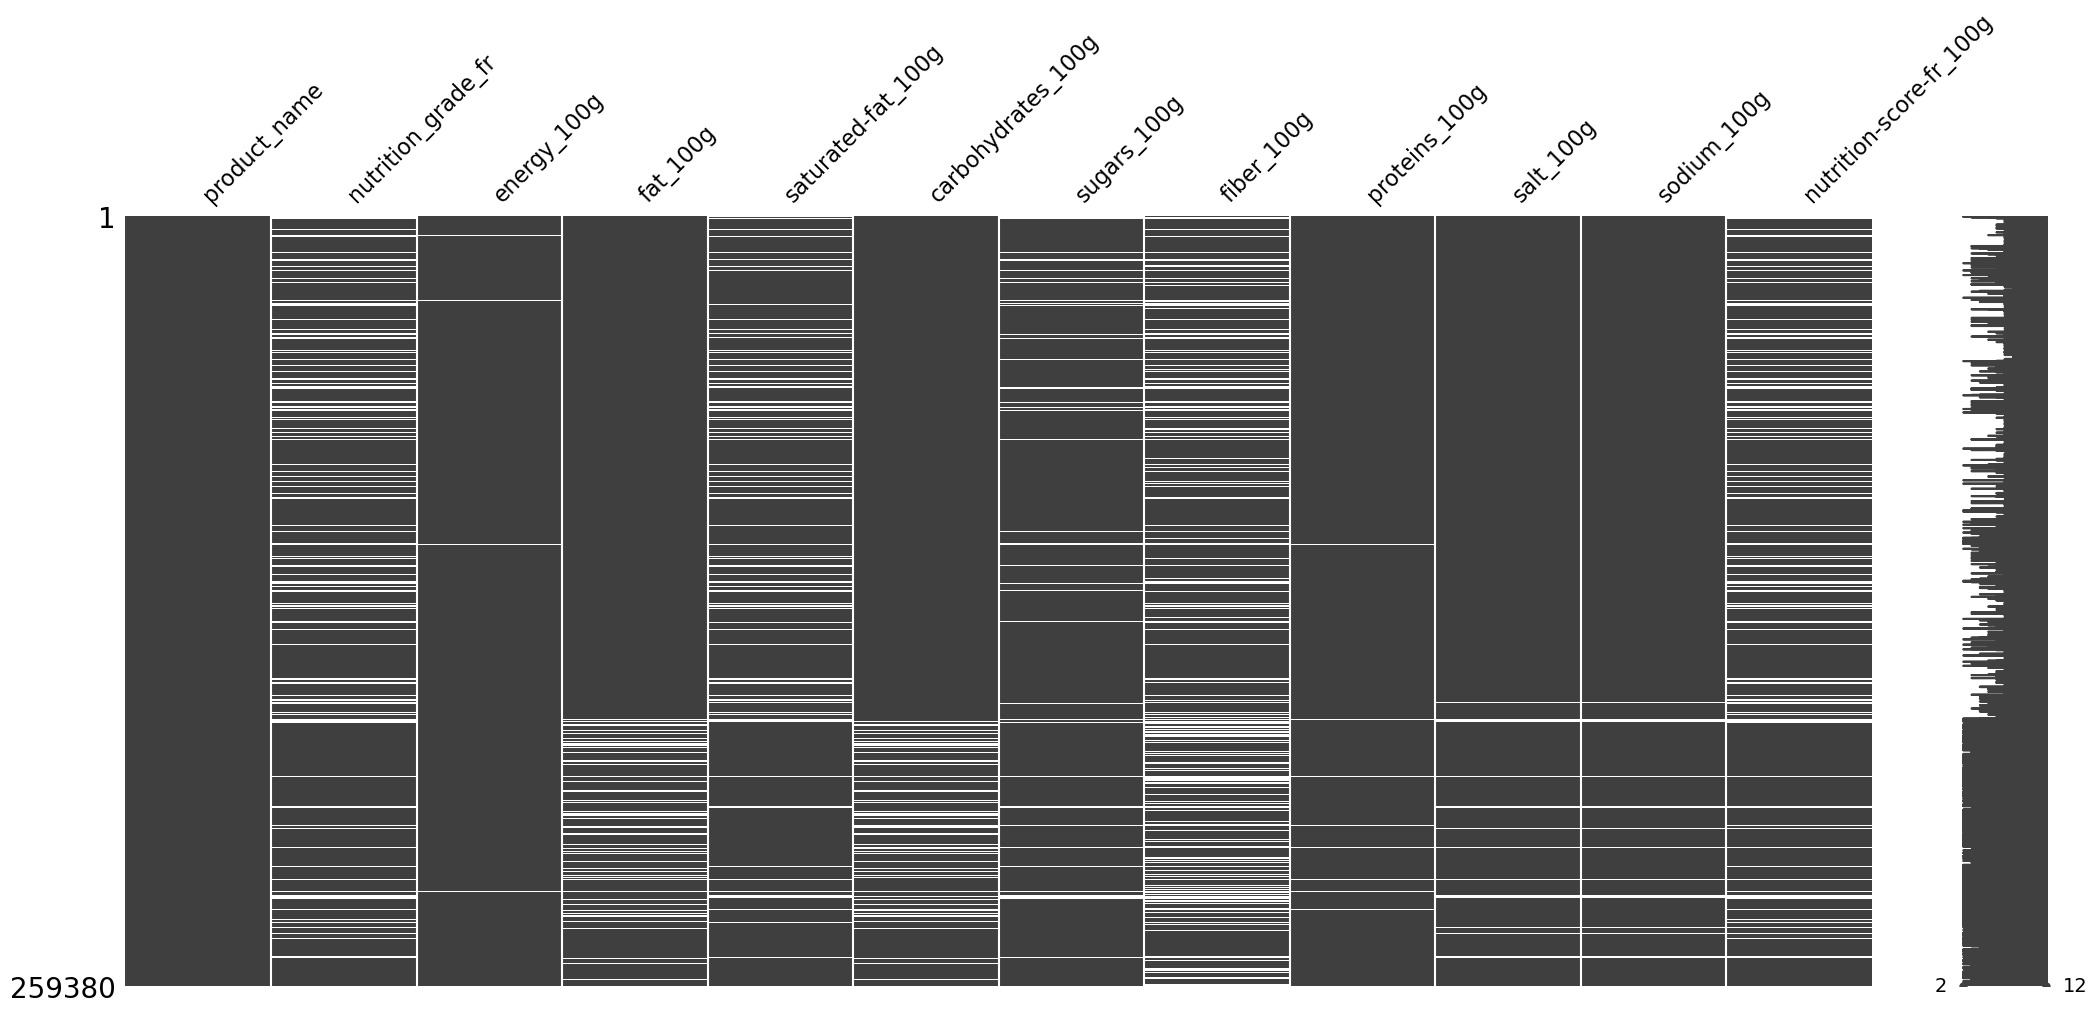

In [21]:
# Affichage graphique des valeurs manquantes pour chaque colonne
msno.matrix(df_final)

<div style="border: 1px solid RGB(190, 29, 88);" >
<h3 style="margin: auto; padding: 20px; color: RGB(190, 29, 88); ">2.4 Analyse des variables qualitatives</h3>
</div>

On va commencer par analyser les variables qualitatives.

In [22]:
# Affichage du nombre de valeurs uniques par colonne
fcn.count_unique_values(df_final, data_quali)

{'product_name': 187459, 'nutrition_grade_fr': 5}

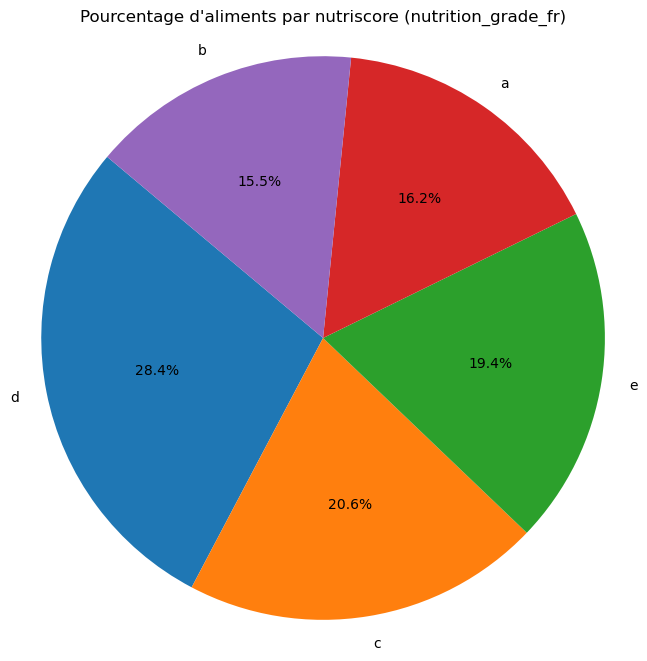

In [23]:
# Affichage d'un pie plot pour les nutriscores
fcn.plot_pie_of_column(df_final, "nutrition_grade_fr", "Pourcentage d'aliments par nutriscore (nutrition_grade_fr)")

On constate qu'il y a une majorité de produits (68.4%) avec un mauvais nutriscore : C, D et E.

<div style="border: 1px solid RGB(190, 29, 88);" >
<h3 style="margin: auto; padding: 20px; color: RGB(190, 29, 88); ">2.5 Analyse des variables quantitatives</h3>
</div>

On va maintenant analyser les variables quantitatives.

In [24]:
# Affichage des statistiques descriptives pour les variables quantitatives
df_final[data_quanti].describe()

energy_100g       fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  2.577730e+05  240584.000000       226641.000000       240276.000000   
mean   1.140497e+03      12.701388            5.115709           32.091647   
std    6.484434e+03      17.574028            8.008095           29.765368   
min    0.000000e+00       0.000000            0.000000            0.000000   
25%    3.730000e+02       0.000000            0.000000            6.000000   
50%    1.100000e+03       5.000000            1.790000           20.600000   
75%    1.674000e+03      20.000000            7.140000           58.500000   
max    3.251373e+06     714.290000          550.000000         2916.670000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  241910.000000  198587.000000  256605.000000  252527.000000   
mean       15.993129       2.863581       7.074330       2.037957   
std        22.345150      12.933636       8.418758     129.023620   
min       -17.860000      -6.700000    -800.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.584200   
75%        24.000000       3.600000      10.000000       1.379220   
max      3520.000000    5380.000000     430.000000   64312.800000   

         sodium_100g  nutrition-score-fr_100g  
count  252488.000000            218463.000000  
mean        0.802467                 9.151724  
std        50.800621                 9.052588  
min         0.000000               -15.000000  
25%         0.025000                 1.000000  
50%         0.230000                10.000000  
75%         0.543000                16.000000  
max     25320.000000                40.000000

On constate déjà qu'il y a des valeurs aberrantes pour les données nutritionnelles, notamment les valeurs négatives et les valeurs supérieurs à 100.

On va donc supprimer les valeurs inférieures à 0 et supérieures à 100 pour les colonnes, sauf "energy_100g" et "nutrition-score-fr_100g" qui seront traitées différemment.

In [25]:
# Sélection des colonnes à traiter
data_quanti_tmp = [element for element in data_quanti if element not in ["energy_100g", "nutrition-score-fr_100g"]]

In [26]:
# Remplacement des valeurs inférieurs à 0 et supérieurs à 100 par NaN
df_final = fcn.replace_values_outside_range(df_final, data_quanti_tmp, 0, 100)

In [27]:
# Suppression des outliers pour les colonnes "energy_100g" et "nutrition-score-fr_100g"
df_final = fcn.replace_outliers_with_nan(df_final, ["energy_100g", "nutrition-score-fr_100g"])

In [28]:
# Affichage des statistiques descriptives pour les variables quantitatives
df_final[data_quanti].describe()

energy_100g       fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  256709.000000  240580.000000       226638.000000        240258.00000   
mean     1113.395627      12.696195            5.111649            32.07302   
std       781.536587      17.497914            7.906154            29.16708   
min         0.000000       0.000000            0.000000             0.00000   
25%       372.000000       0.000000            0.000000             6.00000   
50%      1093.000000       5.000000            1.790000            20.59000   
75%      1674.000000      20.000000            7.140000            58.45750   
max      3619.000000     100.000000          100.000000           100.00000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  241892.000000  198582.000000  256601.000000  252371.000000   
mean       15.975216       2.833600       7.077845       1.593437   
std        21.169760       4.591686       8.163246       6.261328   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.584200   
75%        24.000000       3.600000      10.000000       1.374140   
max       100.000000     100.000000     100.000000     100.000000   

         sodium_100g  nutrition-score-fr_100g  
count  252454.000000            218459.000000  
mean        0.649009                 9.151159  
std         2.663027                 9.051708  
min         0.000000               -15.000000  
25%         0.025000                 1.000000  
50%         0.230000                10.000000  
75%         0.543000                16.000000  
max       100.000000                38.000000

Les données sont déjà mieux uniformisées.

On remarque que certaines colonnes représentent des sous-catégories d'autres mesures :
<ul>
    <li><b>saturated-fat_100g</b> est incluse dans <b>fat_100g</b> ;</li>
    <li><b>sugars_100g</b> et <b>fat_100g</b> sont inclus dans <b>carbohydrates_100g</b> ;</li>
    <li><b>sodium_100g</b> est en quelque sorte reliée à <b>salt_100g</b>, mais il s'agit d'une relation de conversion plutôt que d'inclusion.</li>
</ul>

On a plusieurs types de données nutritionnelles :
<ul>
    <li>les <b>lipides</b> avec <b>fat_100g</b> ;</li>
    <li>les <b>glucides</b> avec <b>carbohydrates_100g</b> ;</li>
    <li>les <b>protéines</b> avec <b>proteins_100g</b> :</li>
    <li>le <b>sel</b> avec <b>salt_100g</b>.</li>
</ul>

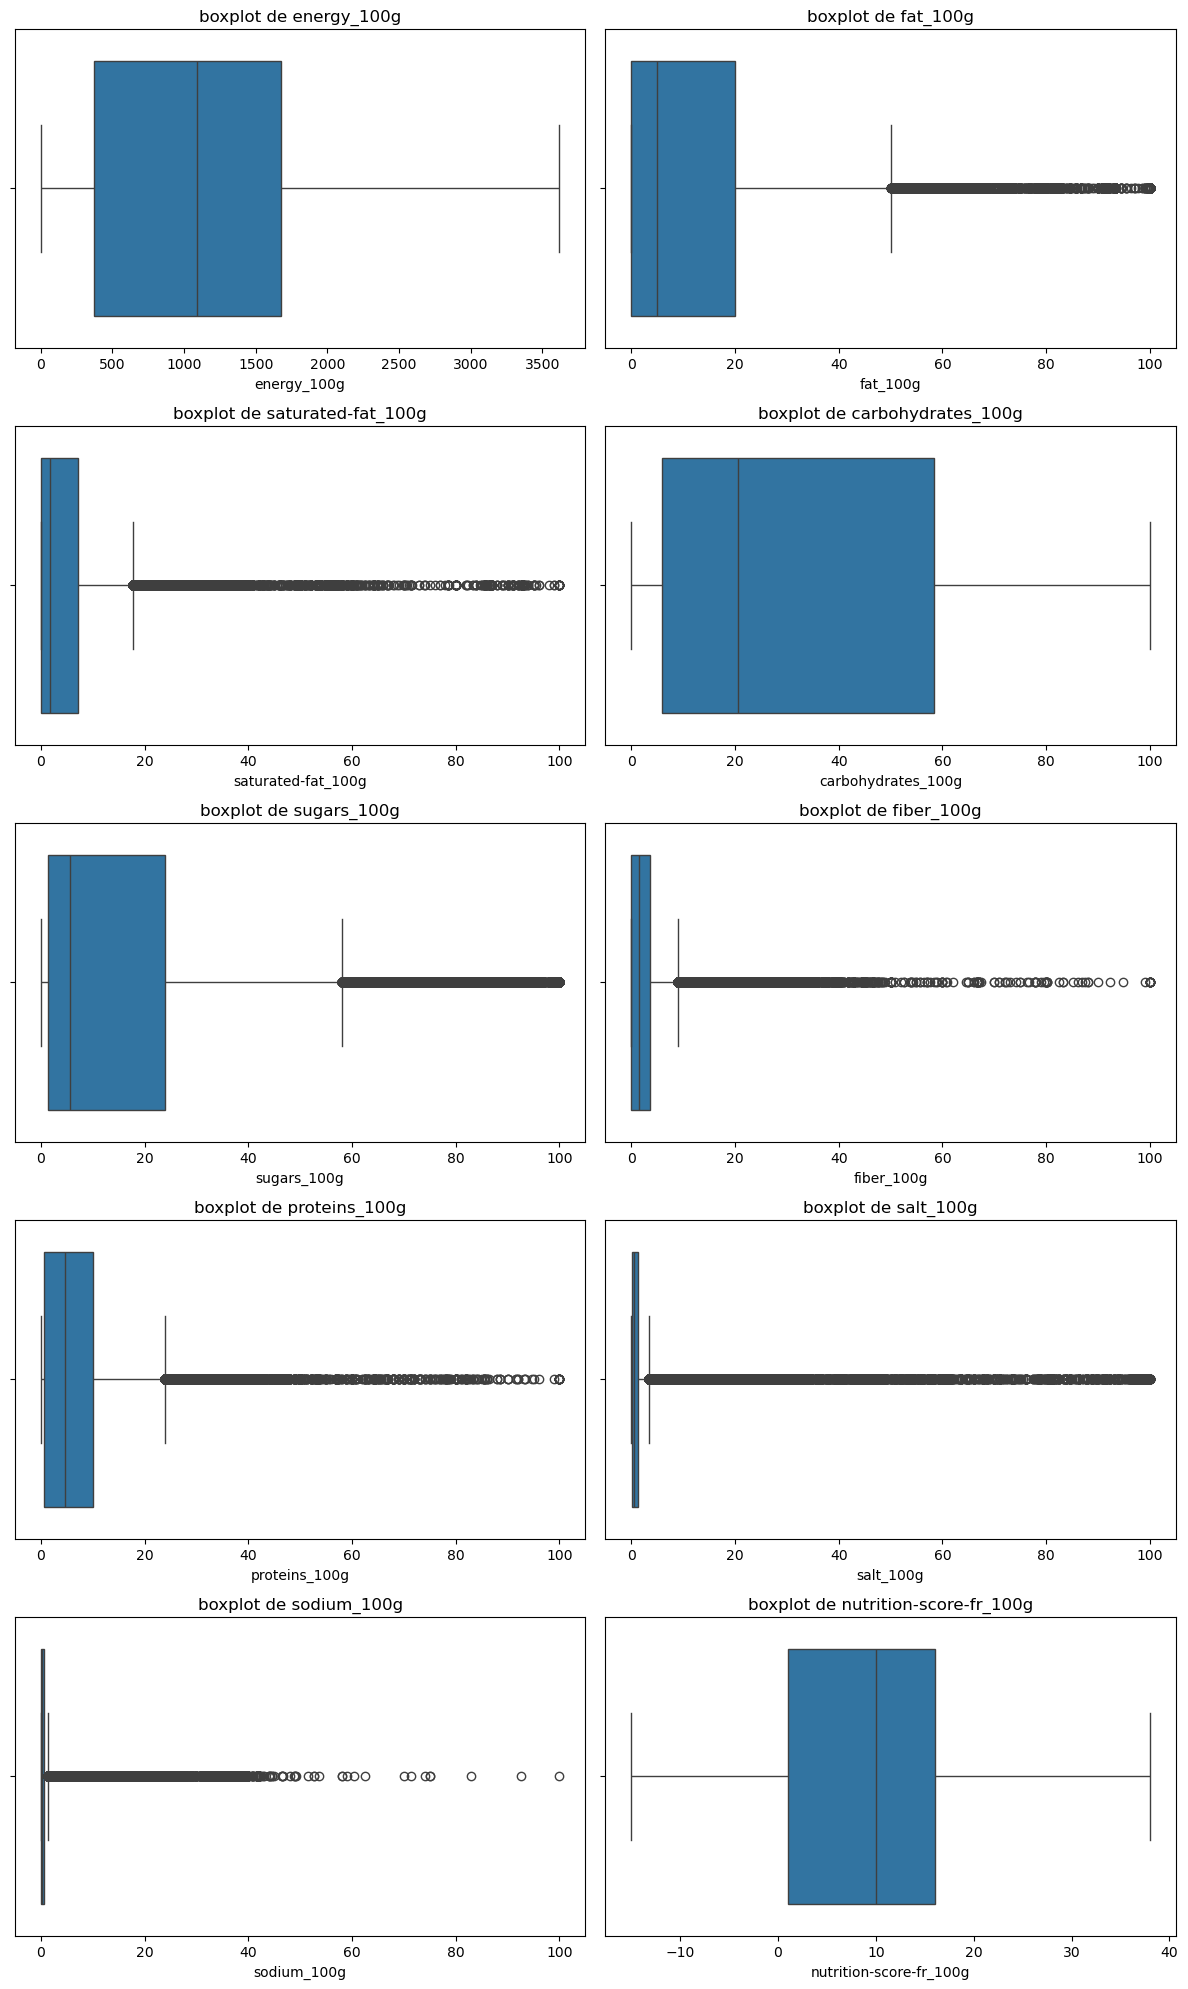

In [29]:
# Affichage des boîtes à moustache pour chaque variable quantitative
fcn.plot_columns(df_final, data_quanti, "boxplot")

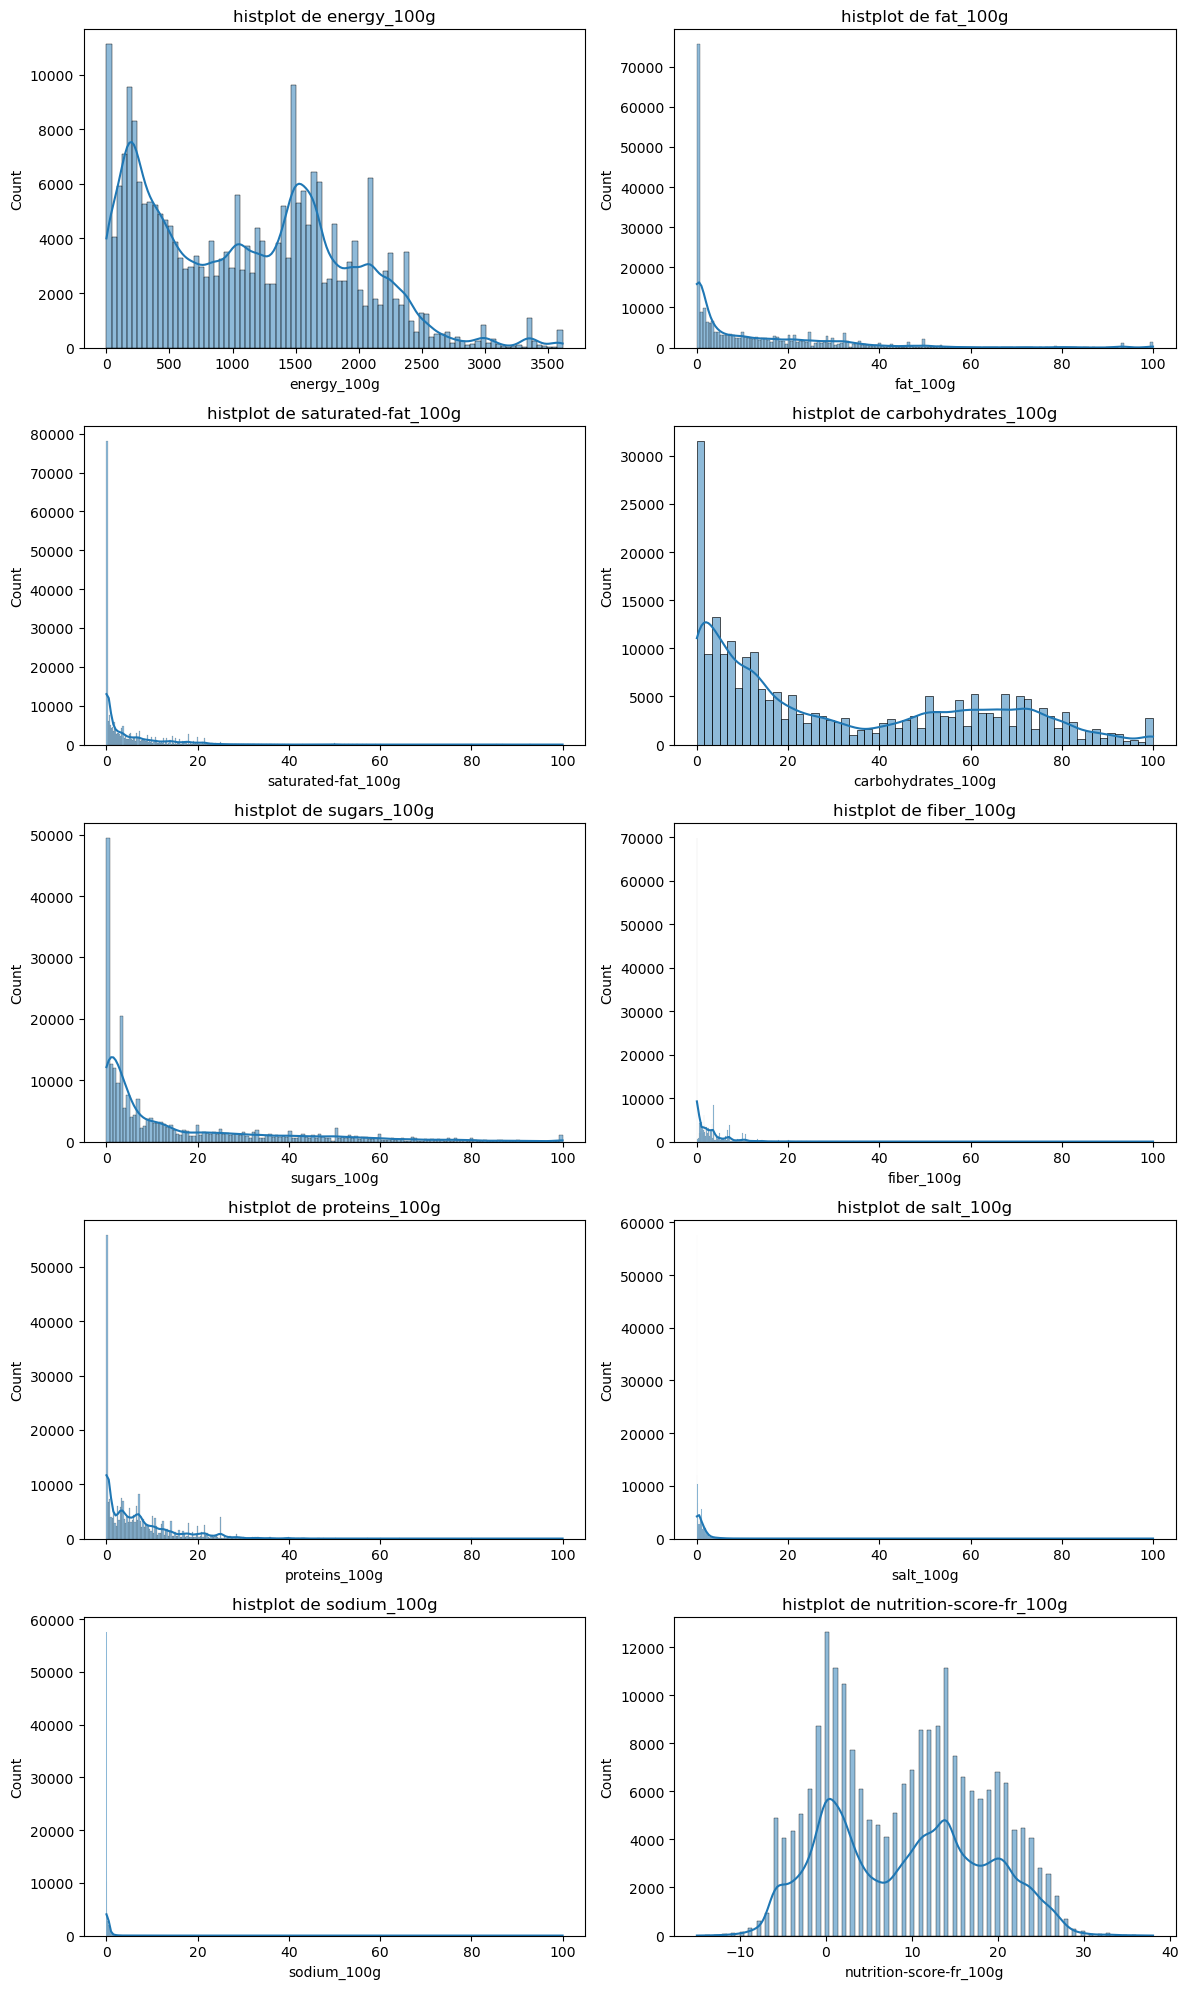

In [30]:
# Affichage des histplots pour chaque variable quantitative
fcn.plot_columns(df_final, data_quanti, "histplot")

Les variables qui ont une distribution plus élevée sont les 3 données nutritionnelles principales (fat_100g, carbohydrates_100g et proteins_100g), ainsi que l'énergie (energy_100g) et le nutriscore (nutrition-score-fr_100g).

In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259380 entries, 1 to 320771
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             259380 non-null  object 
 1   nutrition_grade_fr       218463 non-null  object 
 2   energy_100g              256709 non-null  float64
 3   fat_100g                 240580 non-null  float64
 4   saturated-fat_100g       226638 non-null  float64
 5   carbohydrates_100g       240258 non-null  float64
 6   sugars_100g              241892 non-null  float64
 7   fiber_100g               198582 non-null  float64
 8   proteins_100g            256601 non-null  float64
 9   salt_100g                252371 non-null  float64
 10  sodium_100g              252454 non-null  float64
 11  nutrition-score-fr_100g  218459 non-null  float64
dtypes: float64(10), object(2)
memory usage: 25.7+ MB


On va maintenant faire une analyse bivariée des variables quantitatives deux à deux pour analyser les relations entre chacune des variables.

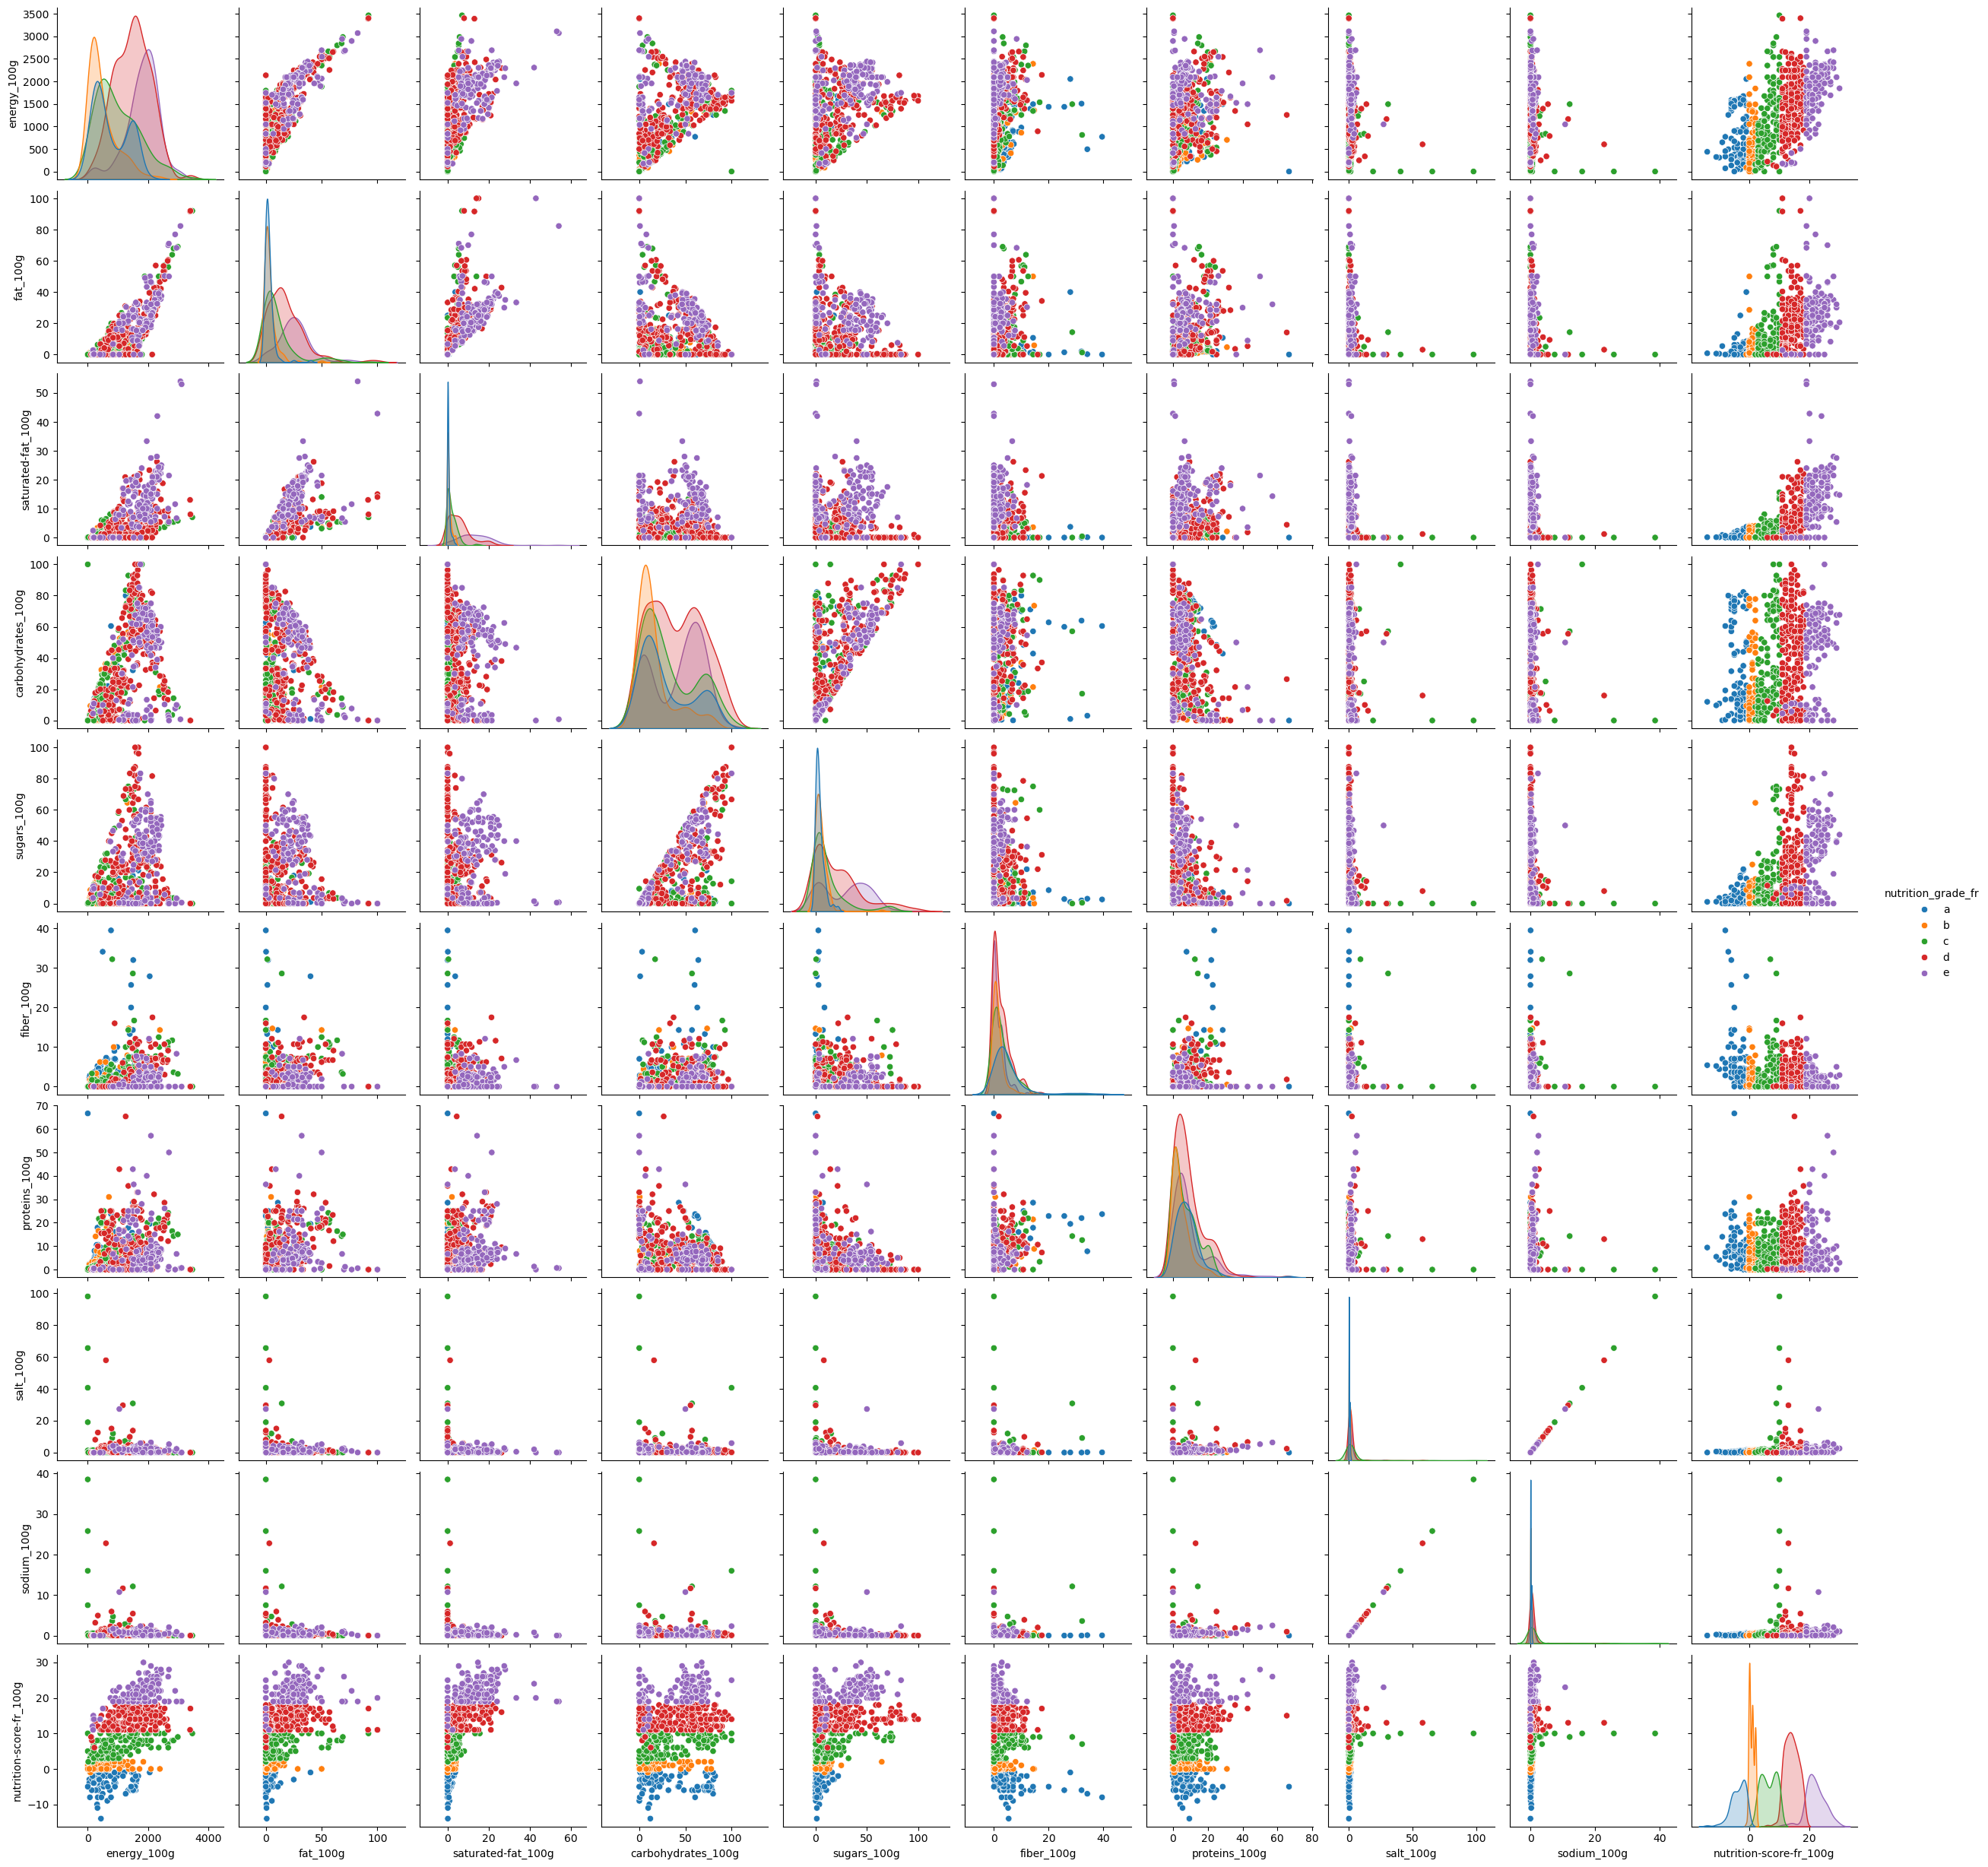

In [32]:
# Analyse bivariée des variables quantitatives
sns.pairplot(df_final.sample(1000, random_state=0).sort_values(by="nutrition_grade_fr"), hue="nutrition_grade_fr")
plt.show()

On constate une forte corrélation entre fat_100g et saturated-fat_100g, et entre carbohydrates_100g et sugars_100g, ce qui est logique vu que saturated-fat_100g est inclus dans fat_100g, et sugars_100g dans carbohydrates_100g.

On remarque aussi une corrélation parfaire entre salt_100g et sodium_100g.

L'énergie (energy_100g) est fortement corrélée avec le gras (fat_100g), puis avec les glucides (carbohydrates_100g) mais de façon moins forte.

Le nutriscore (nutrition-score-fr_100g) est fortement corrélée avec l'énergie (energy_100g).

On va enfin analyser les corrélations entre les variables quantitatives via une matrice de corrélation. Comme nos variables ne suivent pas une loi normale, on va utilise la méthode Spearman.

<Axes: >

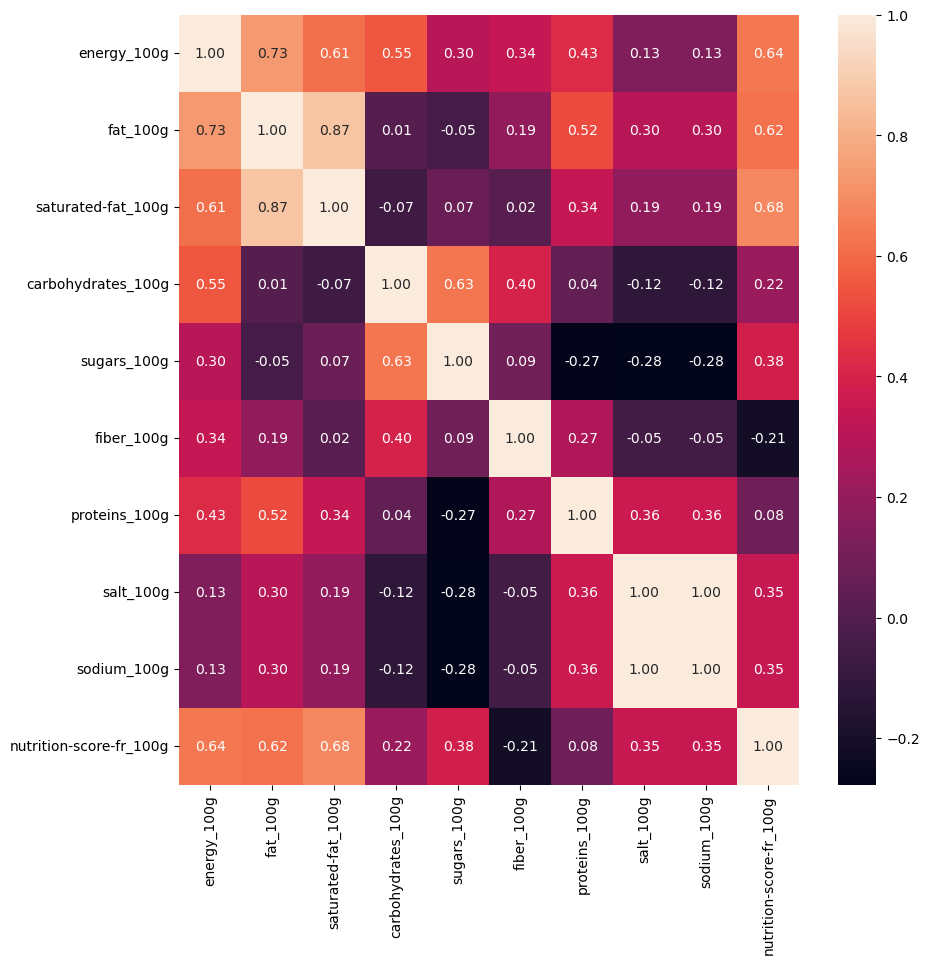

In [33]:
# Utilisation de la méthode spearman car toutes nos variables ne suivent pas une loi normale
plt.figure(figsize=(10,10))

df_final_num = df_final.select_dtypes(include=[np.number])

sns.heatmap(df_final_num.corr(method="spearman"), annot=True, fmt=".2f")

On peut confirmer les premières analyses qu'on avait remarqué avec l'analyse bivariée des variables quantitatives :
<ul>
    <li>Il y a une forte corrélation entre :
        <ul>
            <li>fat_100g et saturated-fat_100g : coefficient de corrélation à 0.87 ;</li>
            <li>carbohydrates_100g et sugars_100g : coefficient de corrélation à 0.63.</li>
        </ul>
    </li>
    <li>Il y a aussi une corrélation parfaite entre salt_100g et sodium_100g (coefficient de corrélation à 1).</li>
    <li>L'énergie est fortement corrélée avec le gras (coefficient de corrélation à 0.73), puis avec les glucides/carbohydrates_100g (coefficient de corrélation à 0.55).</li>
    <li>Le nutriscore est fortement corrélée avec l'énergie (coefficient de corrélation à 0.64).</li>
</ul>

<div style="border: 1px solid RGB(190, 29, 88);" >
<h3 style="margin: auto; padding: 20px; color: RGB(190, 29, 88); ">2.6 Imputation des valeurs manquantes</h3>
</div>

On va maintenant imputer les valeurs des données manquantes afin d'avoir un jeu de données complet pour pouvoir faire le reste de notre analyse.

In [34]:
# Affichage du % de valeurs manquantes pour chaque colonne
fcn.display_missing_values_percentage(df_final)

Pourcentage de valeurs manquantes par colonne :
product_name                0.000000
energy_100g                 1.029763
proteins_100g               1.071401
sodium_100g                 2.670214
salt_100g                   2.702213
sugars_100g                 6.742231
fat_100g                    7.248053
carbohydrates_100g          7.372195
saturated-fat_100g         12.623178
nutrition_grade_fr         15.774925
nutrition-score-fr_100g    15.776467
fiber_100g                 23.439741
dtype: float64


<Axes: >

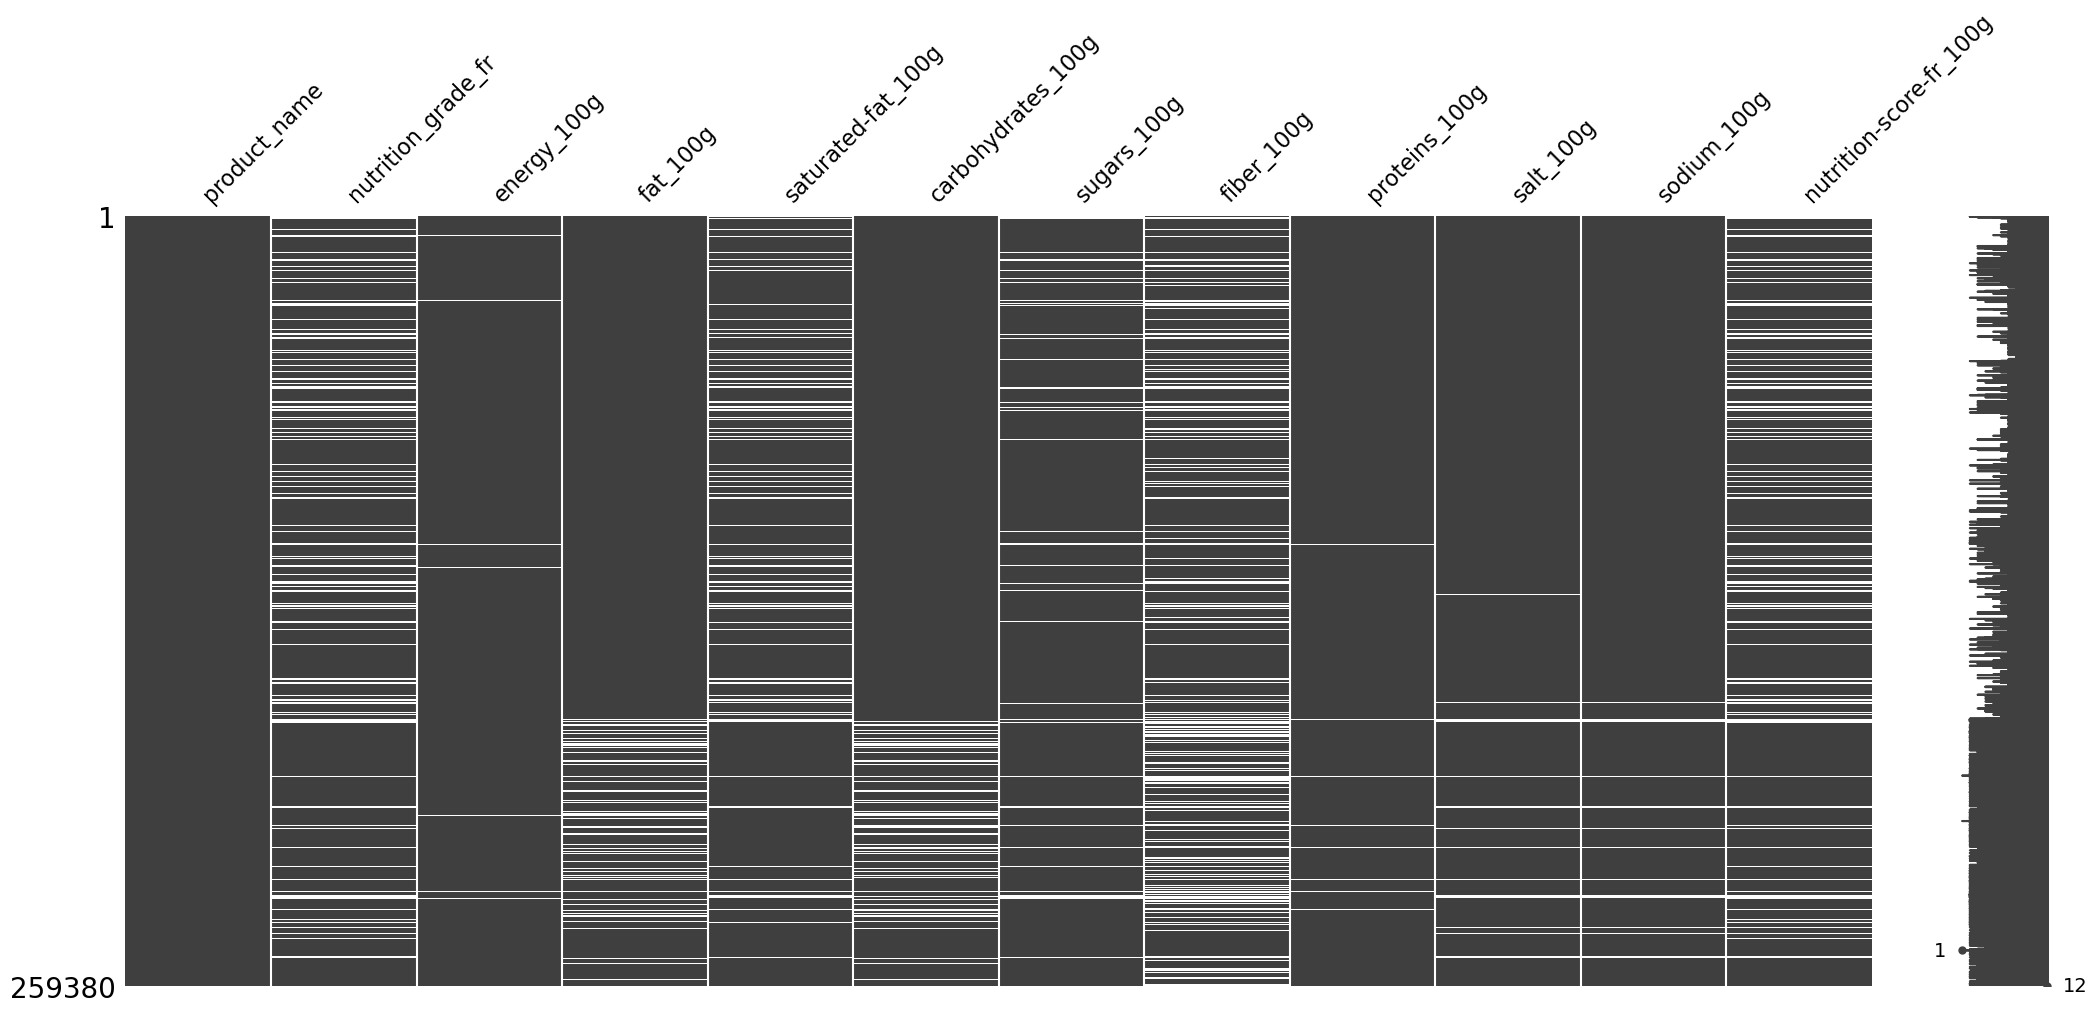

In [35]:
# Affichage graphique des valeurs manquantes pour chaque colonne
msno.matrix(df_final)

On va imputer toutes les valeurs sur les données nutritionnelles par la médiane (et non par la moyenne, car il y a beaucoup d'outliers comme vu avec les boîtes à moustache).

In [36]:
# Imputation des valeurs manquantes par la médiane
df_final['energy_100g'].fillna(df_final['energy_100g'].median(), inplace=True)
df_final['proteins_100g'].fillna(df_final['proteins_100g'].median(), inplace=True)
df_final['sodium_100g'].fillna(df_final['sodium_100g'].median(), inplace=True)
df_final['salt_100g'].fillna(df_final['salt_100g'].median(), inplace=True)
df_final['sugars_100g'].fillna(df_final['sugars_100g'].median(), inplace=True)
df_final['fat_100g'].fillna(df_final['fat_100g'].median(), inplace=True)
df_final['carbohydrates_100g'].fillna(df_final['carbohydrates_100g'].median(), inplace=True)
df_final['saturated-fat_100g'].fillna(df_final['saturated-fat_100g'].median(), inplace=True)
df_final['fiber_100g'].fillna(df_final['fiber_100g'].median(), inplace=True)

<Axes: >

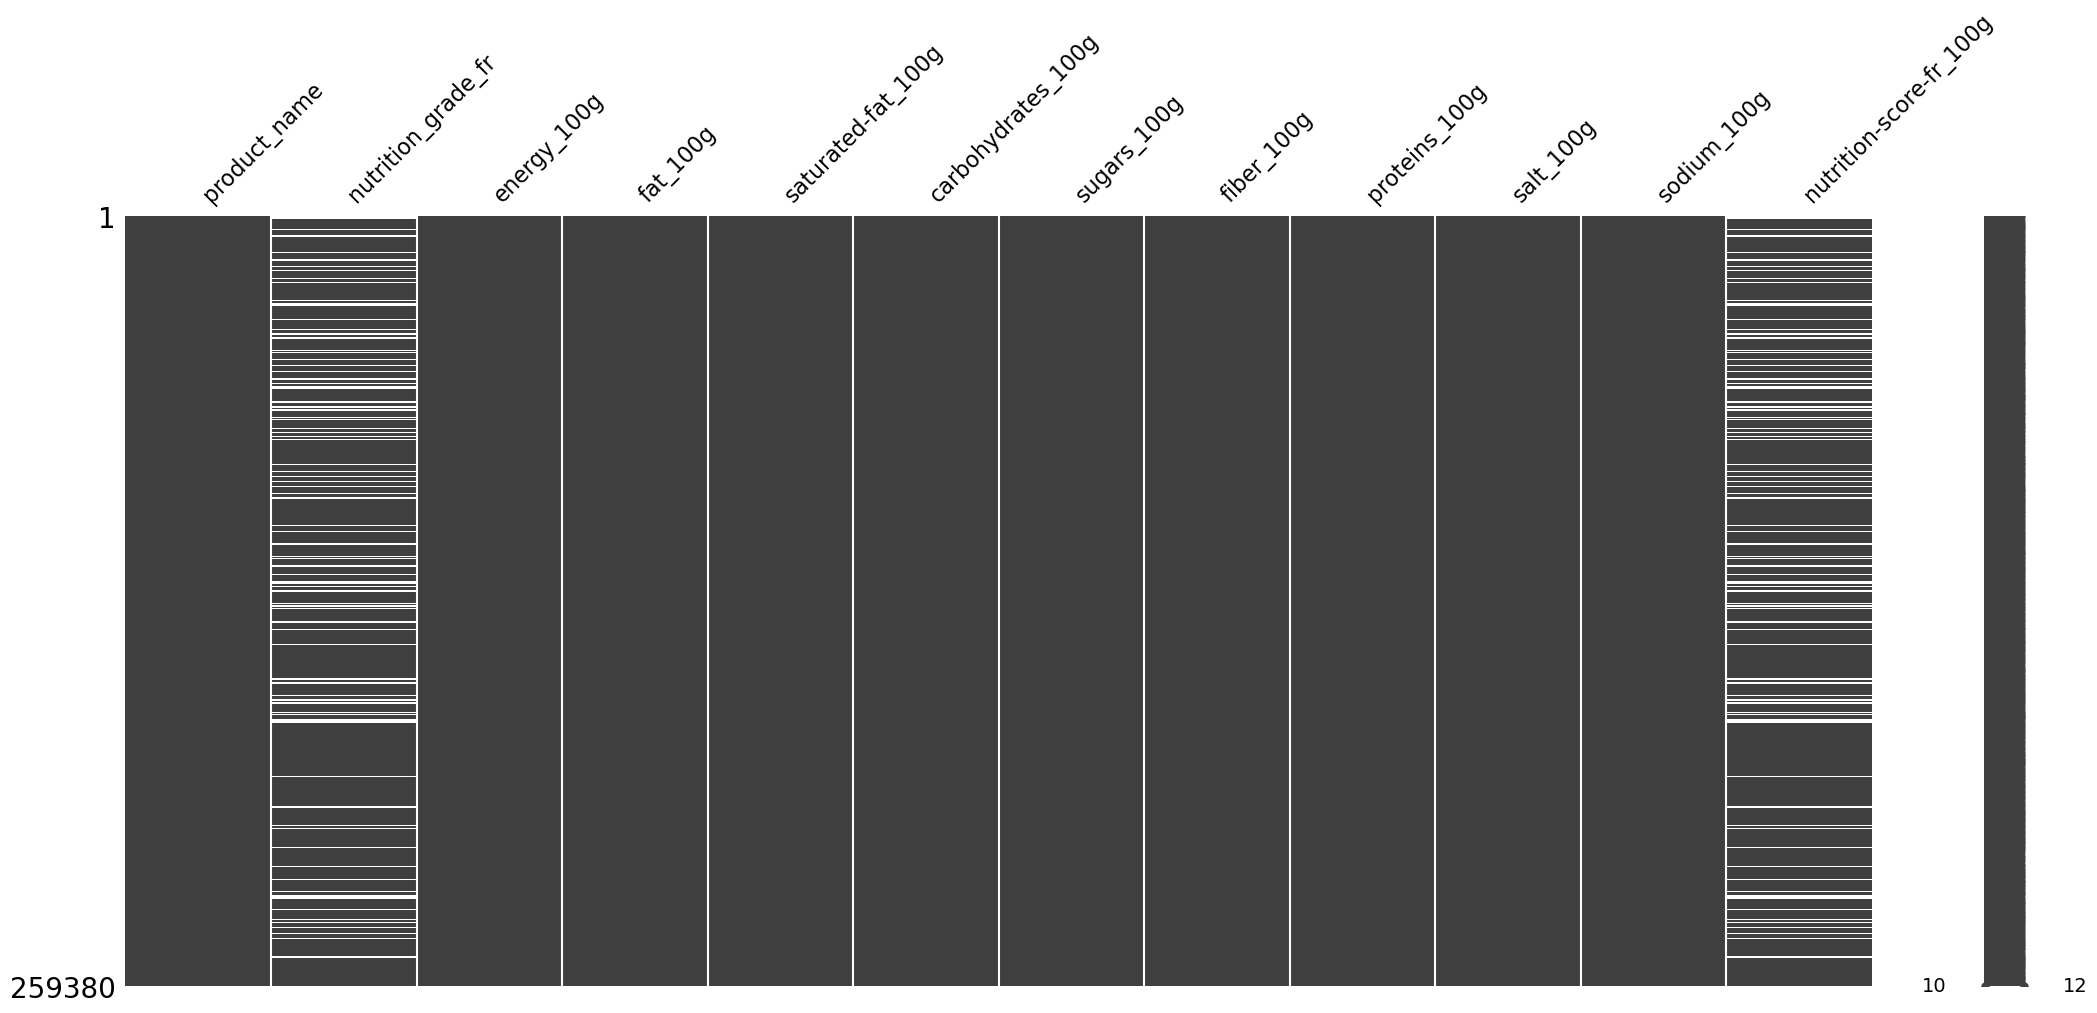

In [37]:
# Affichage graphique des valeurs manquantes pour chaque colonne
msno.matrix(df_final)

Toutes les données nutritionnelles n'ont plus de valeurs manquantes.

On va maintenant imputer les valeurs manquantes de la colonne "nutrition_grade_fr" en utilisant l'algorithme KNN (K-Nearest Neighbors) qui permet d'imputer à un produit, les valeurs des produits qui lui sont le plus proches/similaires.

In [38]:
# Liste des variables à utiliser pour le KNN
knn_quanti = ['energy_100g', 'proteins_100g', 'sodium_100g', 'salt_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g']      

In [39]:
# Imputation des valeurs manquantes de "nutrition_grade_fr" en utilisant l'algorithme KNN
df_final = fcn.impute_nutrition_grade_with_knn(df_final, knn_quanti)

Le nombre optimal de voisins est : 5, avec une exactitude de : 0.8508576081532176


C:\Users\steph\anaconda3\envs\oc_ai_p3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

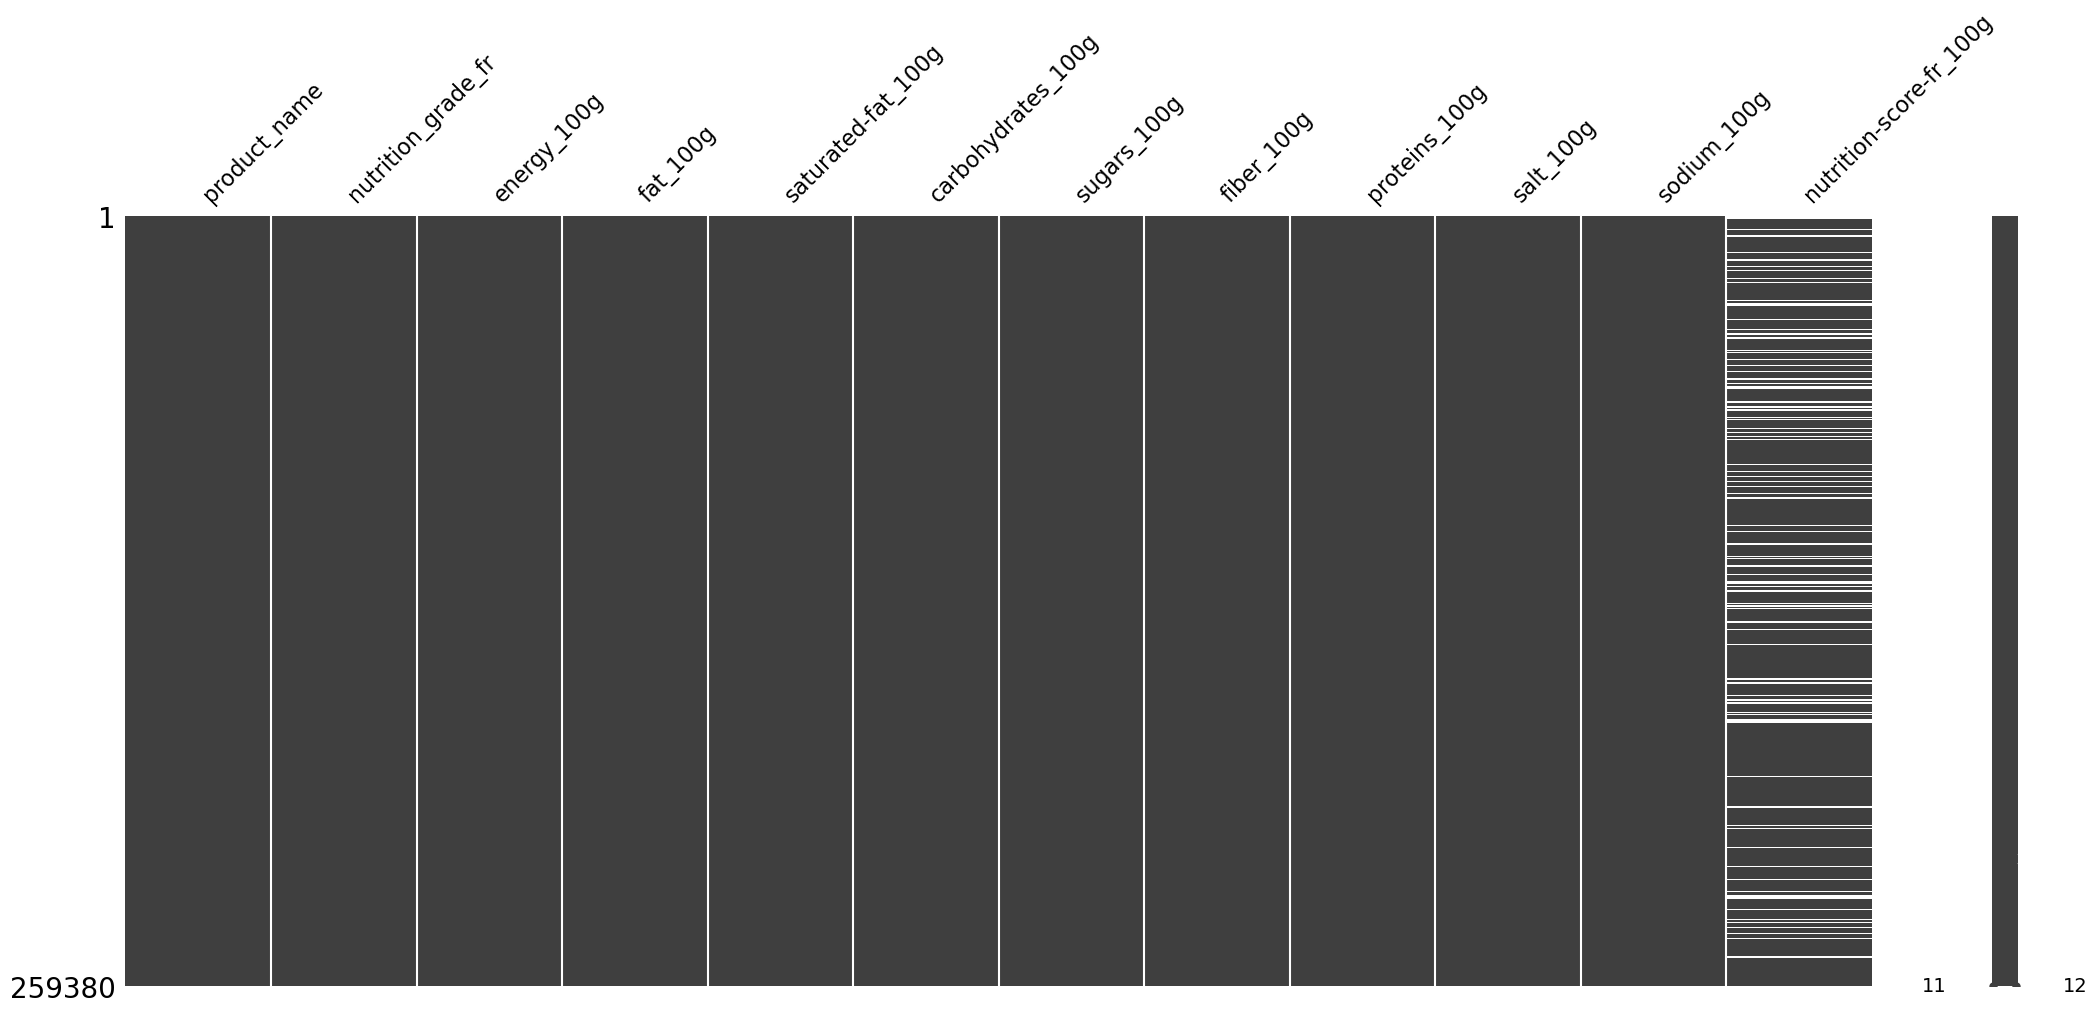

In [40]:
# Affichage graphique des valeurs manquantes pour chaque colonne
msno.matrix(df_final)

On va maintenant remplacer les valeurs manquantes de "nutrition-score-fr_100g" en remplacant par les moyennes des nutriscores correspondants.

In [41]:
# Imputation des valeurs manquantes de "nutrition-score-fr_100g" par la moyenne des "nutrition_grade_fr" correspondants
df_final = fcn.impute_with_mean_by_group(df_final, "nutrition-score-fr_100g", "nutrition_grade_fr")

<Axes: >

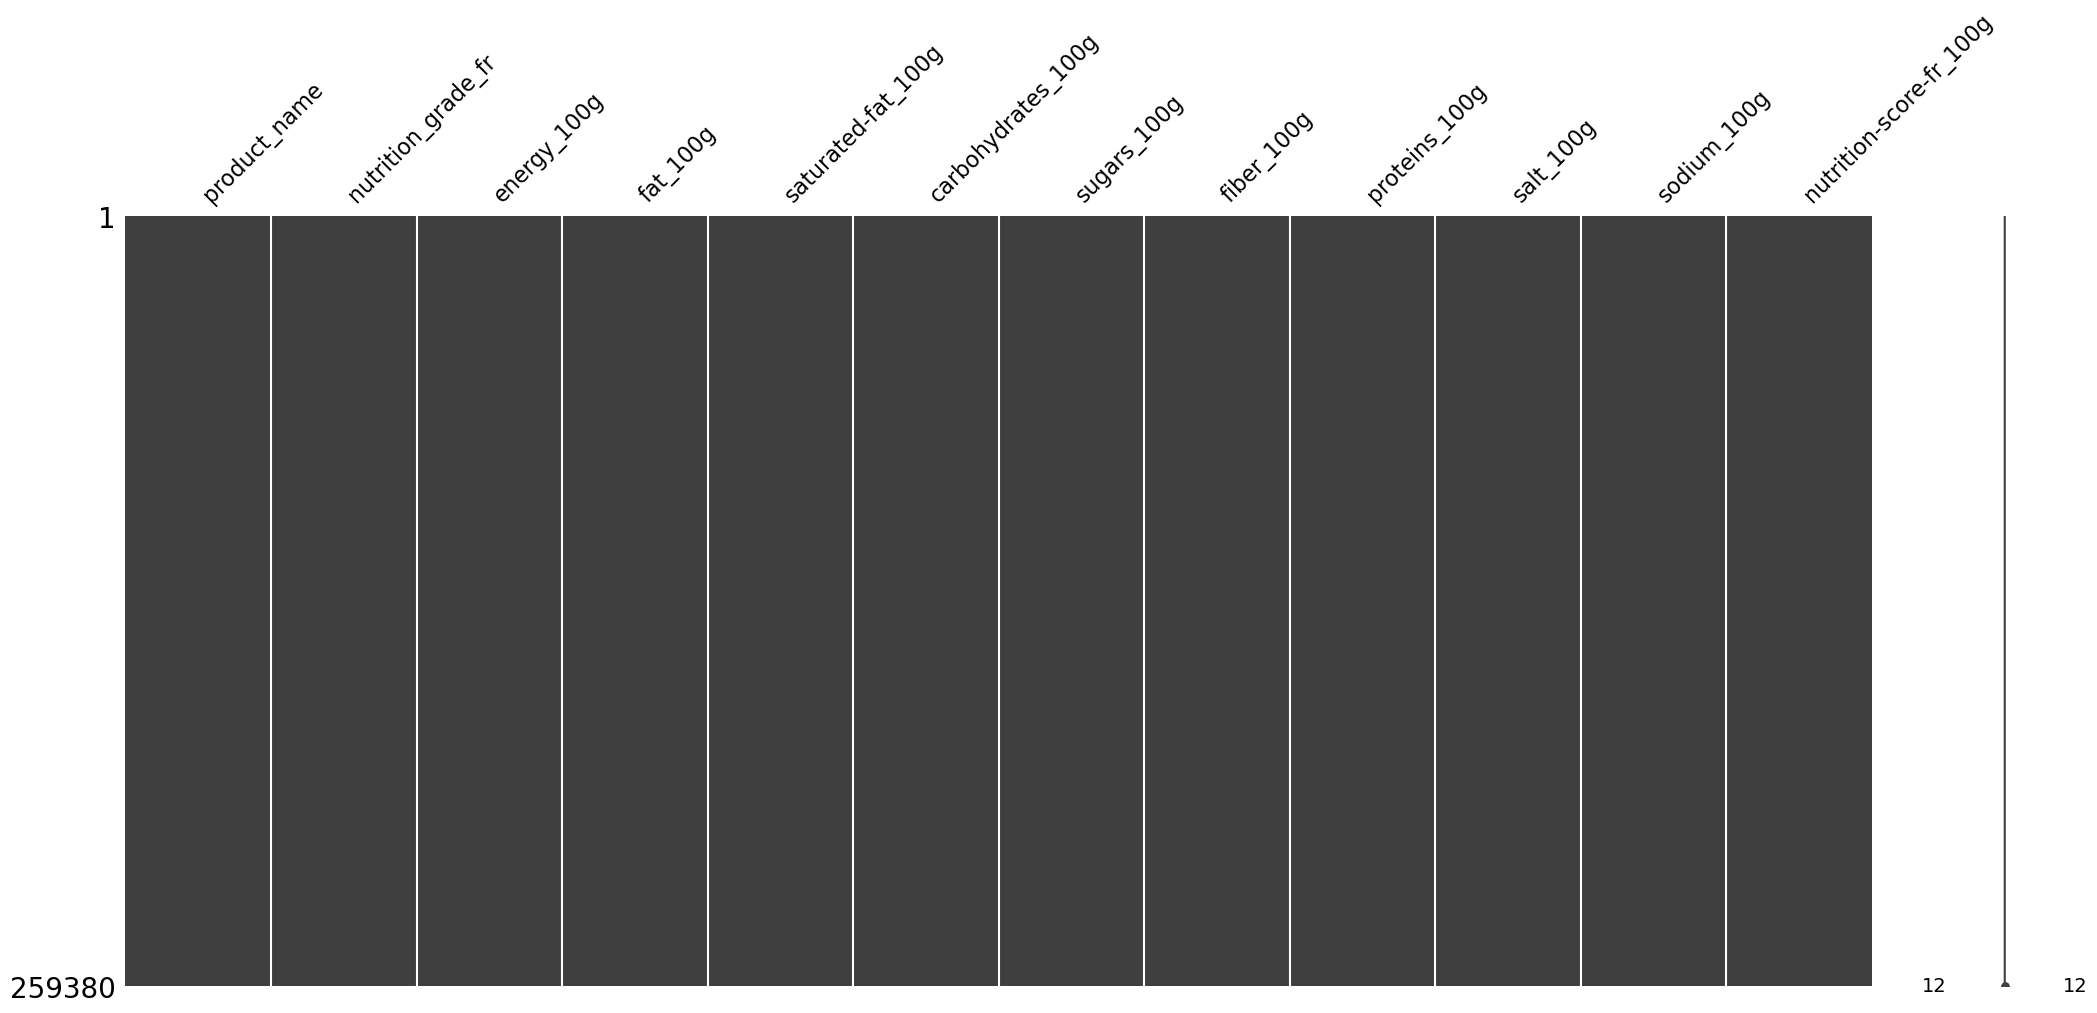

In [42]:
# Affichage graphique des valeurs manquantes pour chaque colonne
msno.matrix(df_final)

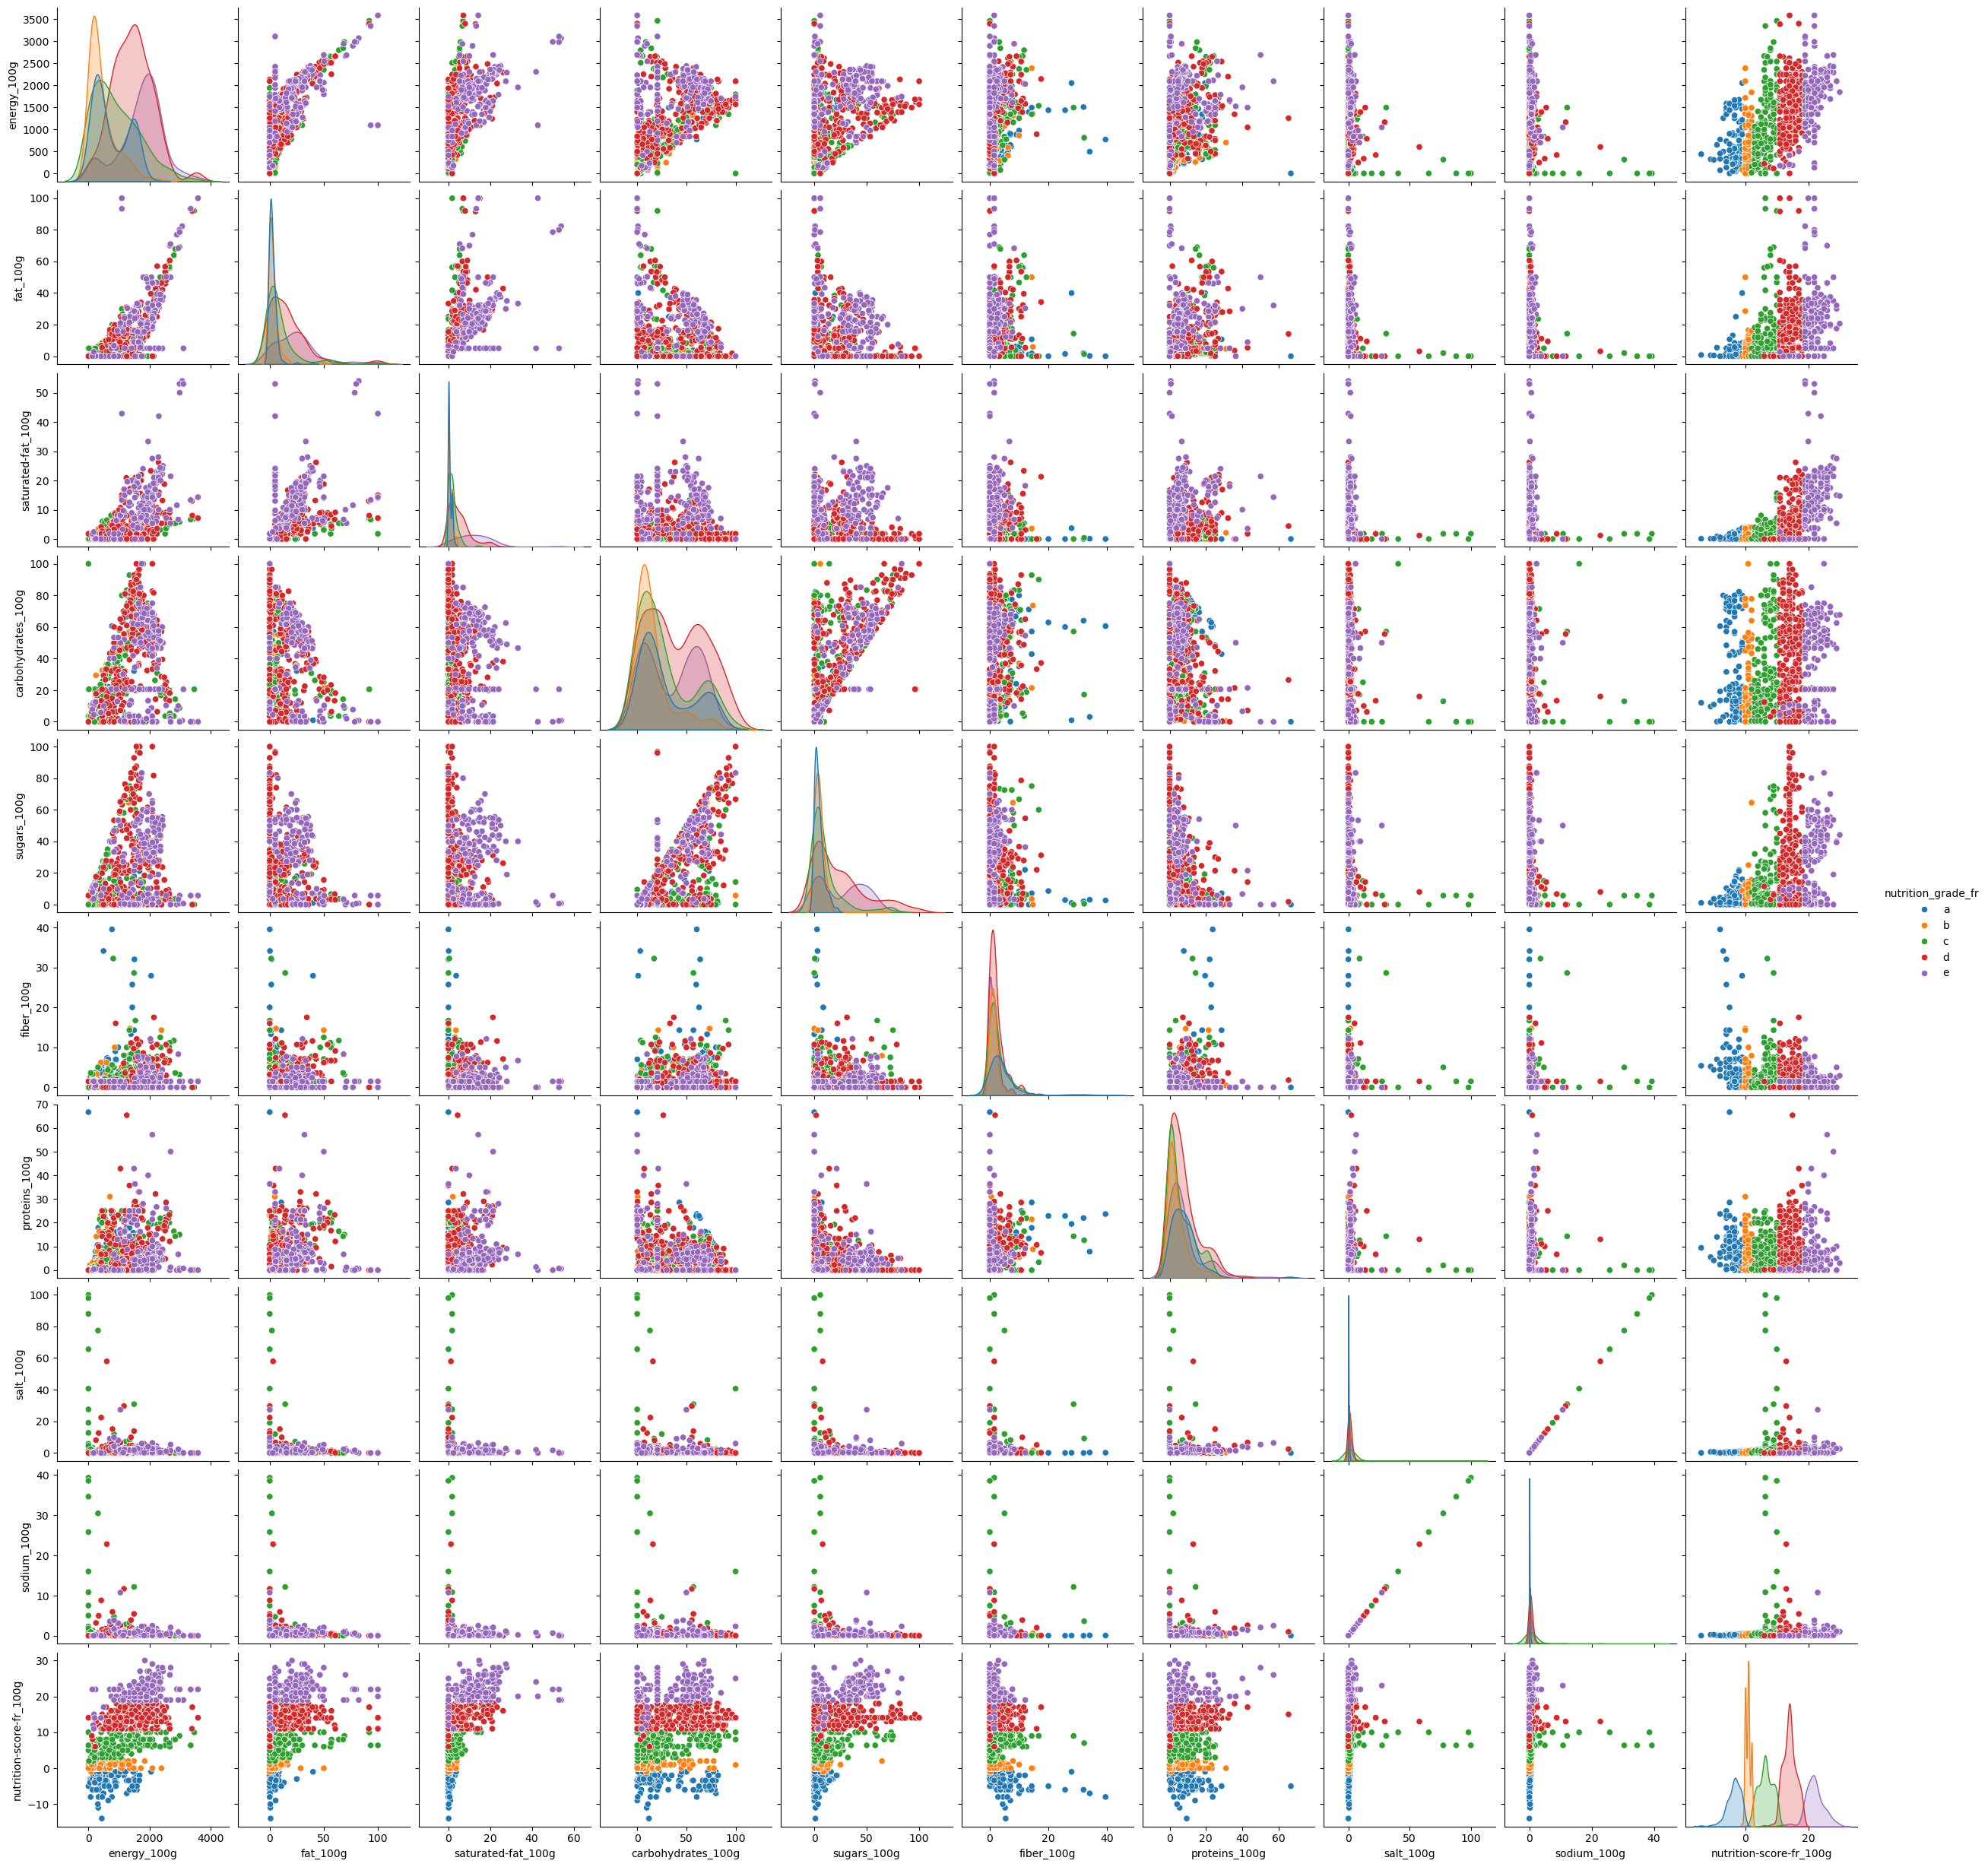

In [43]:
# Analyse bivariée des variables quantitatives
sns.pairplot(df_final.sample(1000, random_state=0).sort_values(by="nutrition_grade_fr"), hue="nutrition_grade_fr")
plt.show()

<Axes: >

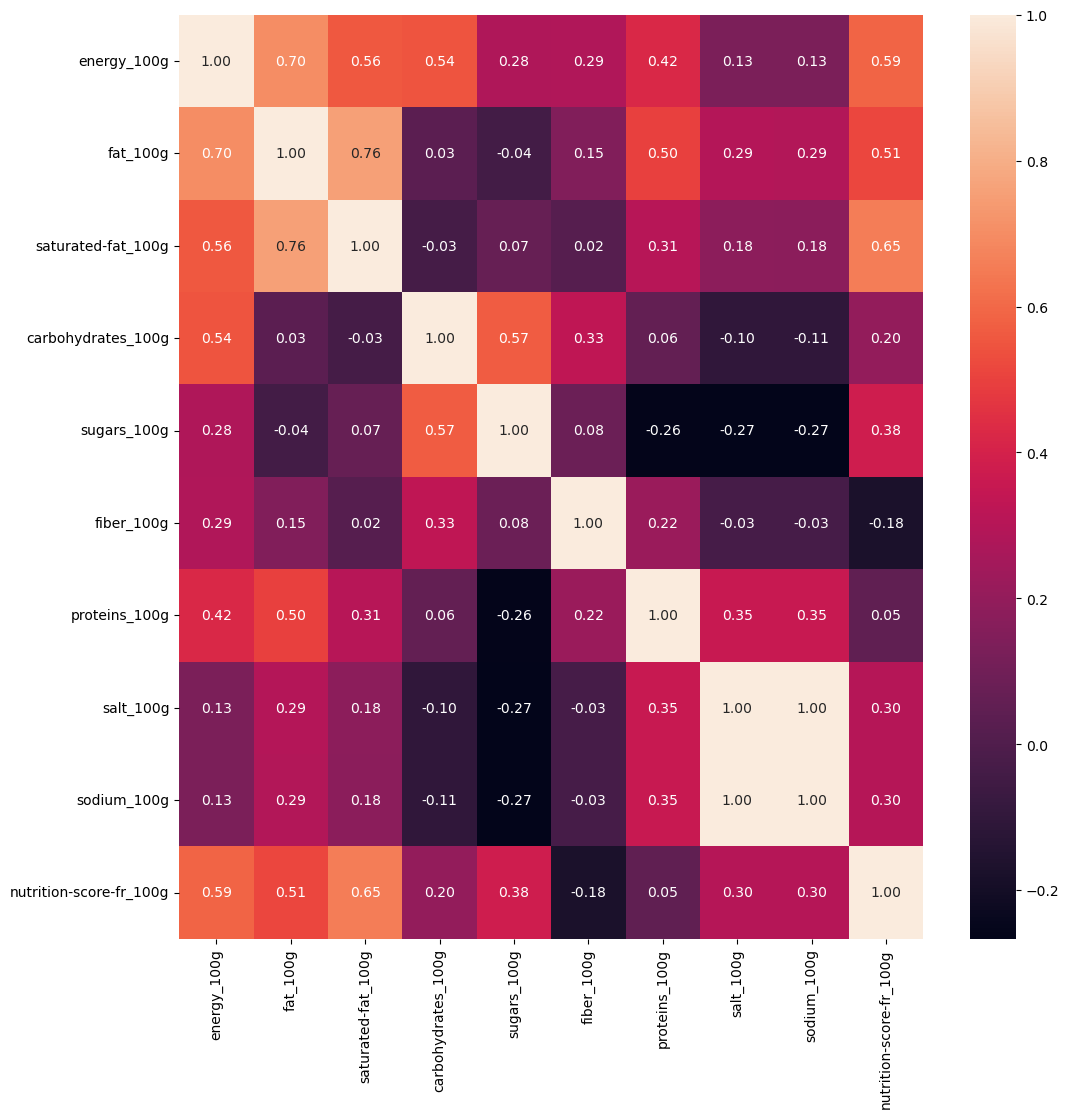

In [45]:
# Heatmap des corrélations entre les variables quantitatives
plt.figure(figsize=(12,12))

df_final_num_2 = df_final.select_dtypes(include=[np.number])

sns.heatmap(df_final_num_2.corr(method="spearman"), annot=True, fmt=".2f")

On peut confirmer les premières analyses qu'on avait remarqué avant d'imputer les valeurs manquantes. L'imputation n'a donc pas modifié les tendances de notre jeu de données.

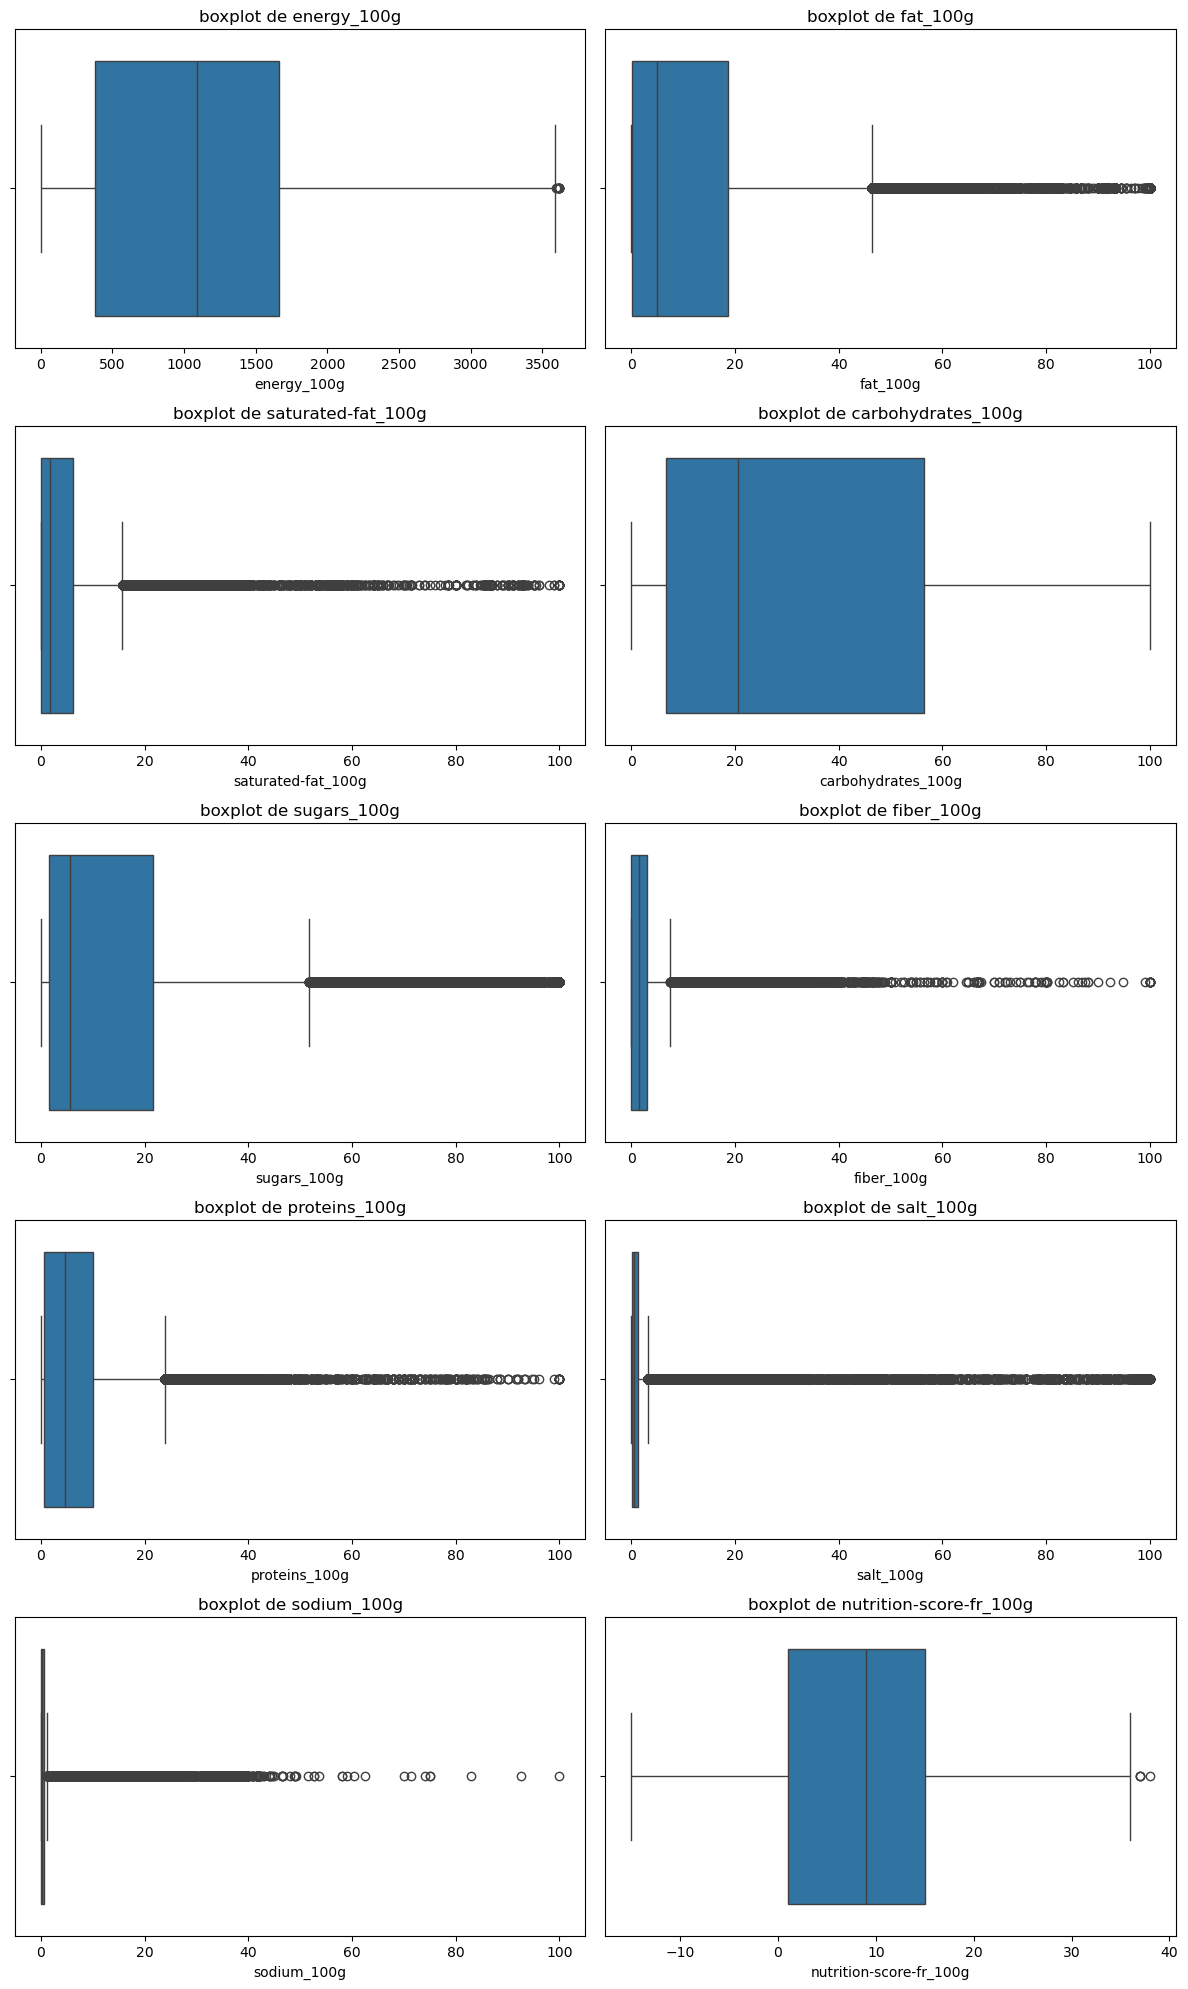

In [46]:
# Affichage des boîtes à moustache pour chaque variable quantitative
fcn.plot_columns(df_final, data_quanti, "boxplot")

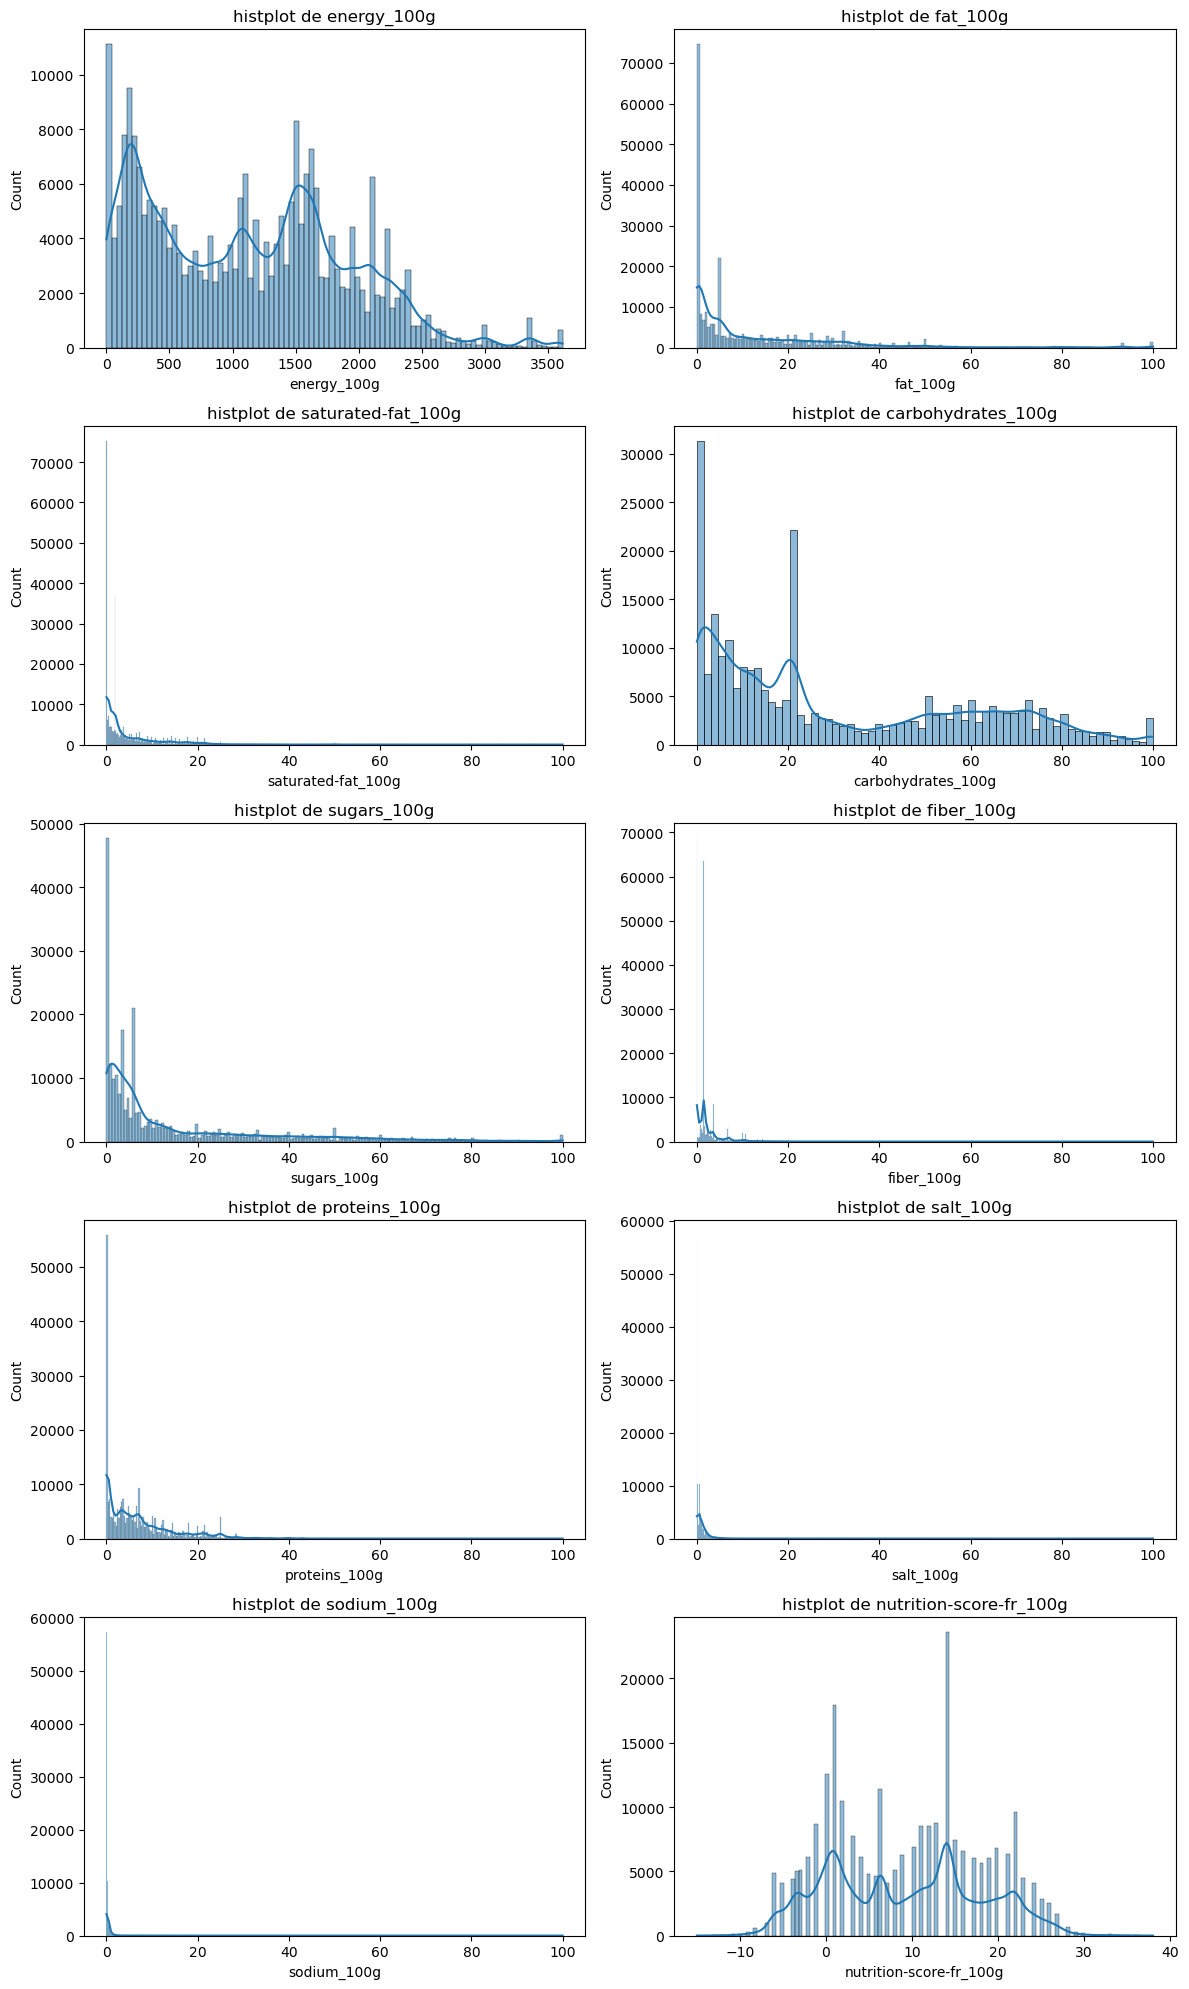

In [47]:
# Affichage des histplots pour chaque variable quantitative
fcn.plot_columns(df_final, data_quanti, "histplot")

<div style="background-color: RGB(25, 62, 144); text-align: center;" >
<h2 style="margin: auto; padding: 20px; color: white">Partie 3 - Analyse en Composantes Principales (ACP)</h2>
</div>

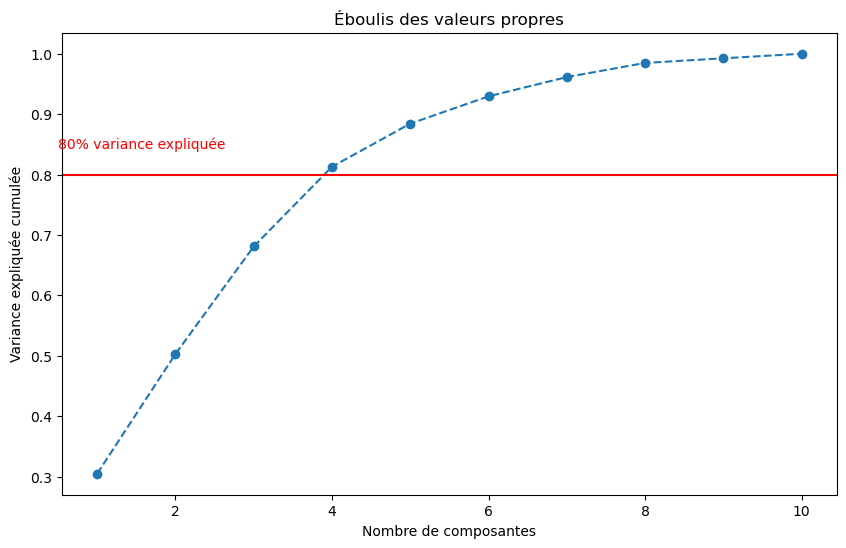

Nombre de composantes à analyser pour atteindre au moins 80% de variance expliquée: 4


In [48]:
# Récupération des données scalées et affichage du nombre de composantes à analyser + éboulis des valeurs propres
pca, data_scaled = fcn.perform_pca_and_return_pca_object(df_final, data_quanti)

In [49]:
# Affichage dans un tableau des corrélations avec les composantes
pcs = pca.components_
pcs_df = pd.DataFrame(pcs, columns=df_final[data_quanti].columns)

pcs_df.index = [f"F{i}" for i in range(1, len(pcs) + 1)]
pcs_df_rounded = pcs_df.round(2)

pcs_subset = pcs_df_rounded.iloc[:4, :]

styled_table = pcs_subset.style.background_gradient(cmap=plt.get_cmap('coolwarm'), axis=None)

styled_table

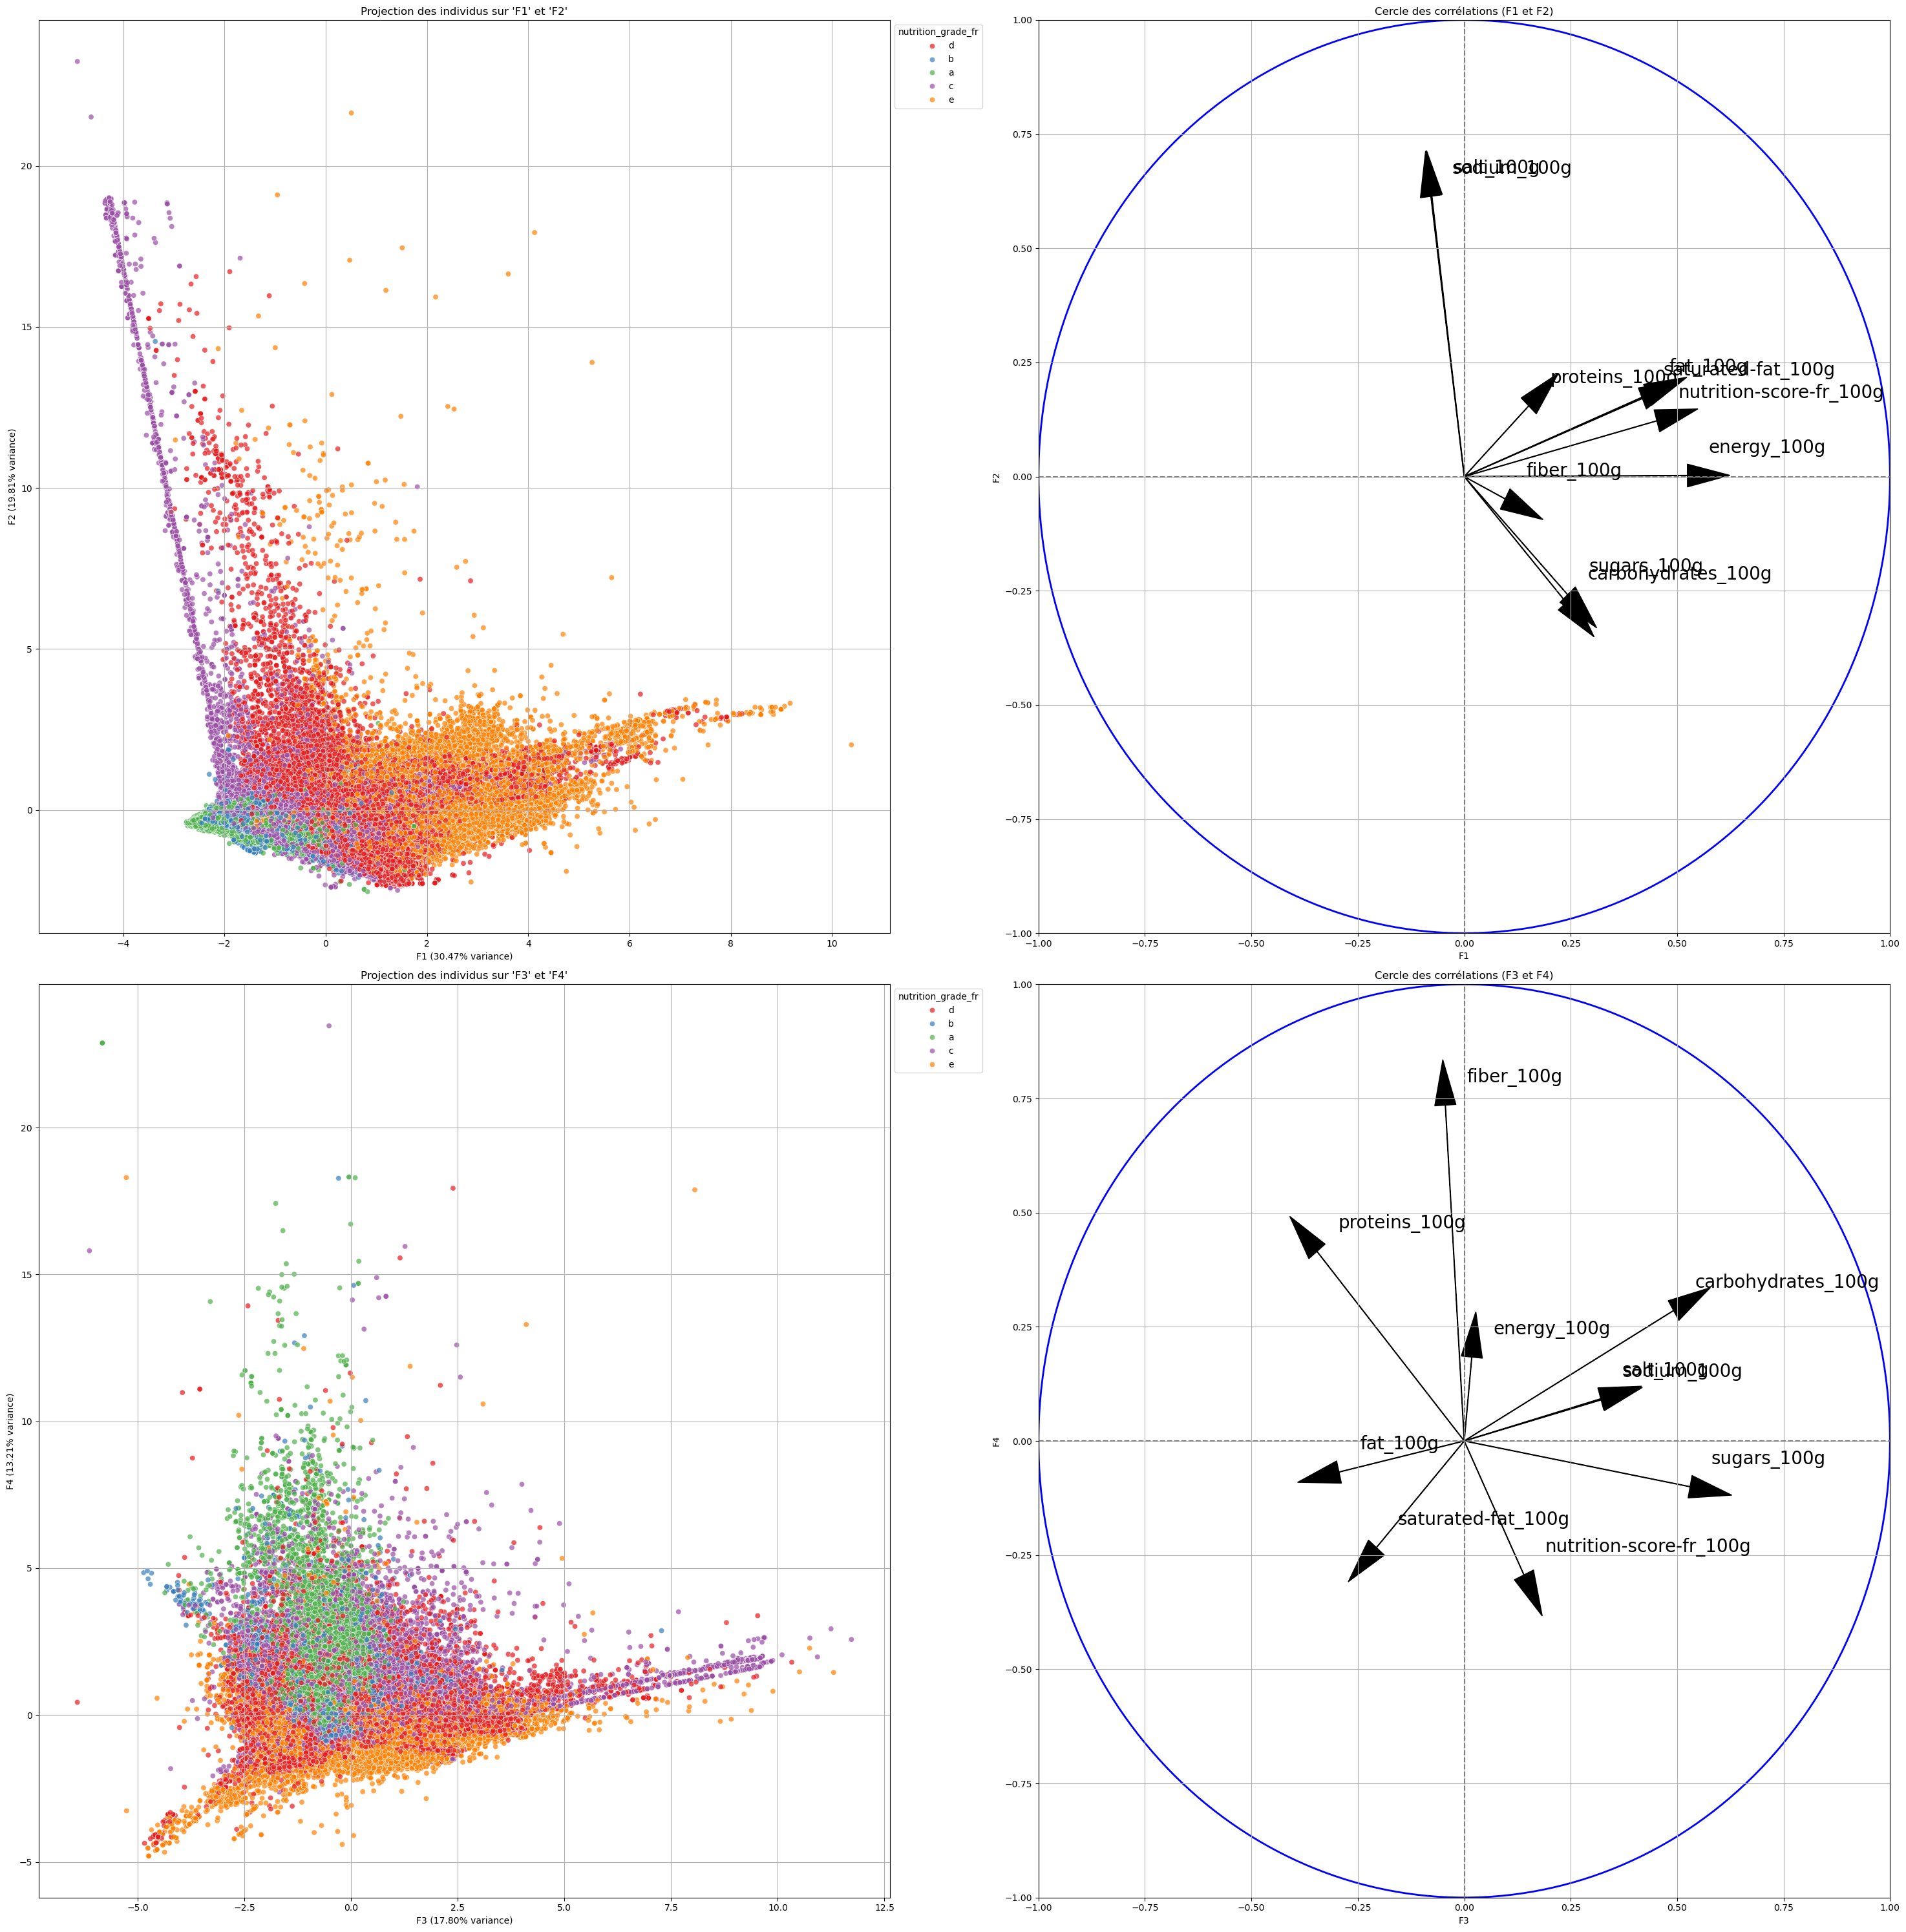

In [50]:
# Affichage des projections et des cercles de corrélation
fcn.plot_pca_results_colored(pca, pca.transform(data_scaled), data_quanti, df_final["nutrition_grade_fr"])

L'Analyse en Composantes Principales (ACP) a permis d'identifier quatre composantes principales (F1 à F4), correspondant aux axes d'inertie les plus significatifs du nuage de points des individus, capturant ensemble 81,3% de l'inertie totale. Les axes d'inertie suivants présentent une variance trop faible pour justifier une analyse détaillée.

<ul>
    <li><b>F1</b> :
        <ul>
            <li>La variable "energy_100g" est fortement projetée sur l'axe F1, ce qui indique que l'énergie est fortement corrélée positivement avec la première composante principale. Cela signifie que les produits qui ont une valeur élevée sur l'axe F1 sont susceptibles d'être plus énergétiques, c'est-à-dire qu'ils ont ont plus de calories.</li>
            <li>Les variables "saturated-fat_100g" et "fat_100g" sont également fortement projetées sur F1, ce qui suggère que les graisses totales et les graisses saturées sont également des contributeurs significatifs à l'énergie des produits alimentaires et sont donc positivement corrélées avec l'énergie.</li>
            <li>"nutrition-score-fr_100g" a une orientation vers la droite et un peu vers le haut, montrant une corrélation modérée avec F1. Cela suggère que les produits ayant un score nutritionnel moins favorable sont généralement plus riches en énergie, en graisses et en graisses saturées.</li>
            <li>La corrélation de "sugars_100g" avec F1 est moins prononcée que celle de l'énergie ou des graisses, mais il y a toujours une tendance positive, indiquant que les sucres contribuent aussi, dans une moindre mesure, à l'énergie et au profil nutritionnel des produits.</li>
        </ul>
    </li>
</ul>

<ul>
    <li><b>F2</b> :
        <ul>
            <li>Les variables "sodium_100g" et "salt_100g" sont quasi-verticales et montent, ce qui indique une forte corrélation positive avec la deuxième composante principale. Cela suggère que les produits qui ont une valeur élevée sur l'axe F2 sont plus susceptibles d'avoir une teneur élevée en sel.</li>
            <li>"fiber_100g" et "proteins_100g" sont projetées vers le bas, mais plus proches de l'axe F2 que de F1, indiquant qu'elles sont plus liées à F2. Cela peut signifier que les produits avec une teneur élevée en fibres et en protéines sont généralement moins salés, ou que la teneur en sel n'a pas d'impact majeur sur ces nutriments.</li>
            <li>La projection de "nutrition-score-fr_100g" sur l'axe F2 est légère, suggérant que bien qu'il y ait une relation entre le score nutritionnel et la teneur en sel, elle n'est pas aussi forte que la relation entre le score nutritionnel et l'énergie ou les graisses.</li>
        </ul>
    </li>
</ul>

<ul>
    <li><b>F3</b> :
        <ul>
            <li>"carbohydrates_100g" et "sugars_100g" sont fortement projetées sur l'axe F3, indiquant une corrélation positive avec cette composante. Cela suggère que les produits ayant une valeur élevée sur l'axe F3 sont riches en glucides et en sucres.</li>
            <li>"saturated-fat_100g" et "fat_100g" sont également orientées dans le même sens que les glucides sur l'axe F3 mais avec une corrélation moins forte. Cela pourrait suggérer que les produits qui sont riches en glucides et en sucres tendent également à avoir une certaine quantité de graisses, bien que cette relation soit moins directe.</li>
            <li>"energy_100g" a une petite projection sur F3, suggérant que l'énergie est moins fortement associée à la composition en glucides et sucres que ce que F1 indiquait avec les graisses.</li>
        </ul>
    </li>
</ul>

<ul>
    <li><b>F4</b> :
        <ul>
            <li>"fiber_100g" et "proteins_100g" sont orientées vers le haut, ce qui indique une corrélation positive avec F4. Les produits qui se situent plus haut sur cet axe ont tendance à être riches en fibres et en protéines.</li>
            <li>"nutrition-score-fr_100g" montre une projection négative sur l'axe F4, ce qui indique une corrélation négative. Ainsi, les produits qui ont un meilleur score nutritionnel (plus faible, indiquant une meilleure qualité nutritionnelle) peuvent être associés à une teneur plus élevée en fibres et en protéines.</li>
            <li>Les variables "sodium_100g" et "salt_100g" ont une projection vers le bas de l'axe F4, indiquant une faible association avec les produits plus riches en fibres et protéines.</li>
        </ul>
    </li>
</ul>

<div style=" background-color: RGB(247, 227, 237); padding: 10px 10px;">
    <h3 style="text-decoration: underline; font-weight: bold;">En résumé</h3>
    <p><b>F1</b> révèle que les produits plus énergétiques tendent à avoir plus de graisses et de sucres, et sont associés à un score nutritionnel moins favorable.</p>
    <p><b>F2</b> montre une distinction principalement basée sur la teneur en sel, indépendante de la teneur en énergie, en graisses et en sucres, mais potentiellement en relation inverse avec les fibres et les protéines.</p>
    <p><b>F3</b> distingue les produits selon leur teneur en glucides et en sucres, avec une certaine relation avec les graisses et l'énergie, mais moins prononcée que celle observée avec F1.</p>
    <p><b>F4</b> différencie les produits selon leur teneur en fibres et en protéines, en indiquant une tendance vers une meilleure qualité nutritionnelle pour ceux qui sont plus riches dans ces nutriments.</p>
</div>

Voici des hypothèses que l'on peut faire sur les produits en fonction de leur nutriscore :
<ul>
    <li><b>Nutriscore A</b> : Produits probablement faibles en graisses, en sucres et en sel, avec des teneurs élevées en fibres et en protéines</li>
    <li><b>Nutriscore B</b> : Produits avec des teneurs modérément faibles en graisses et sucres, relativement équilibrés en sel, et bons en fibres et protéines.</li>
    <li><b>Nutriscore C</b> : Produits avec des teneurs moyennes en graisses et sucres, peut-être légèrement plus salés, avec des niveaux acceptables de fibres et de protéines.</li>
    <li><b>Nutriscore D</b> : Produits plus riches en graisses et sucres, avec une teneur en sel qui peut être significative, et des niveaux plus bas en fibres et protéines.</li>
    <li><b>Nutriscore E</b> : Produits très riches en graisses, sucres et sel, et très probablement faibles en fibres et protéines.</li>
</ul>

<div style="background-color: RGB(25, 62, 144); text-align: center;" >
<h2 style="margin: auto; padding: 20px; color: white">Partie 4 - Kruskal-Wallis</h2>
</div>

On va maintenant faire une analyse multi-variée.

Comme nos données ne suivent pas une loi normale, on va utiliser le test de Kruskal-Wallis.

On va d'abord définir les paramètres de notre test.
<ul>
    <li><b>Hypothèse H0</b> : Il n'existe aucune corrélation entre nos variables</li>
    <li><b>Seuil de signification</b> : On accepte un risque de 5 % de conclure à tort qu'il existe une corrélation lorsque ce n'est pas le cas.</li>
</ul>

                  Variable    H-value  P-value  Eta-squared
0              energy_100g   88769.92      0.0         0.66
1                 fat_100g   64671.81      0.0         0.75
2       saturated-fat_100g  105531.93      0.0         0.59
3       carbohydrates_100g   16802.92      0.0         0.94
4              sugars_100g   35464.23      0.0         0.86
5               fiber_100g   18385.43      0.0         0.93
6            proteins_100g    8820.49      0.0         0.97
7                salt_100g   24718.87      0.0         0.91
8              sodium_100g   24727.71      0.0         0.91
9  nutrition-score-fr_100g  245069.06      0.0         0.06


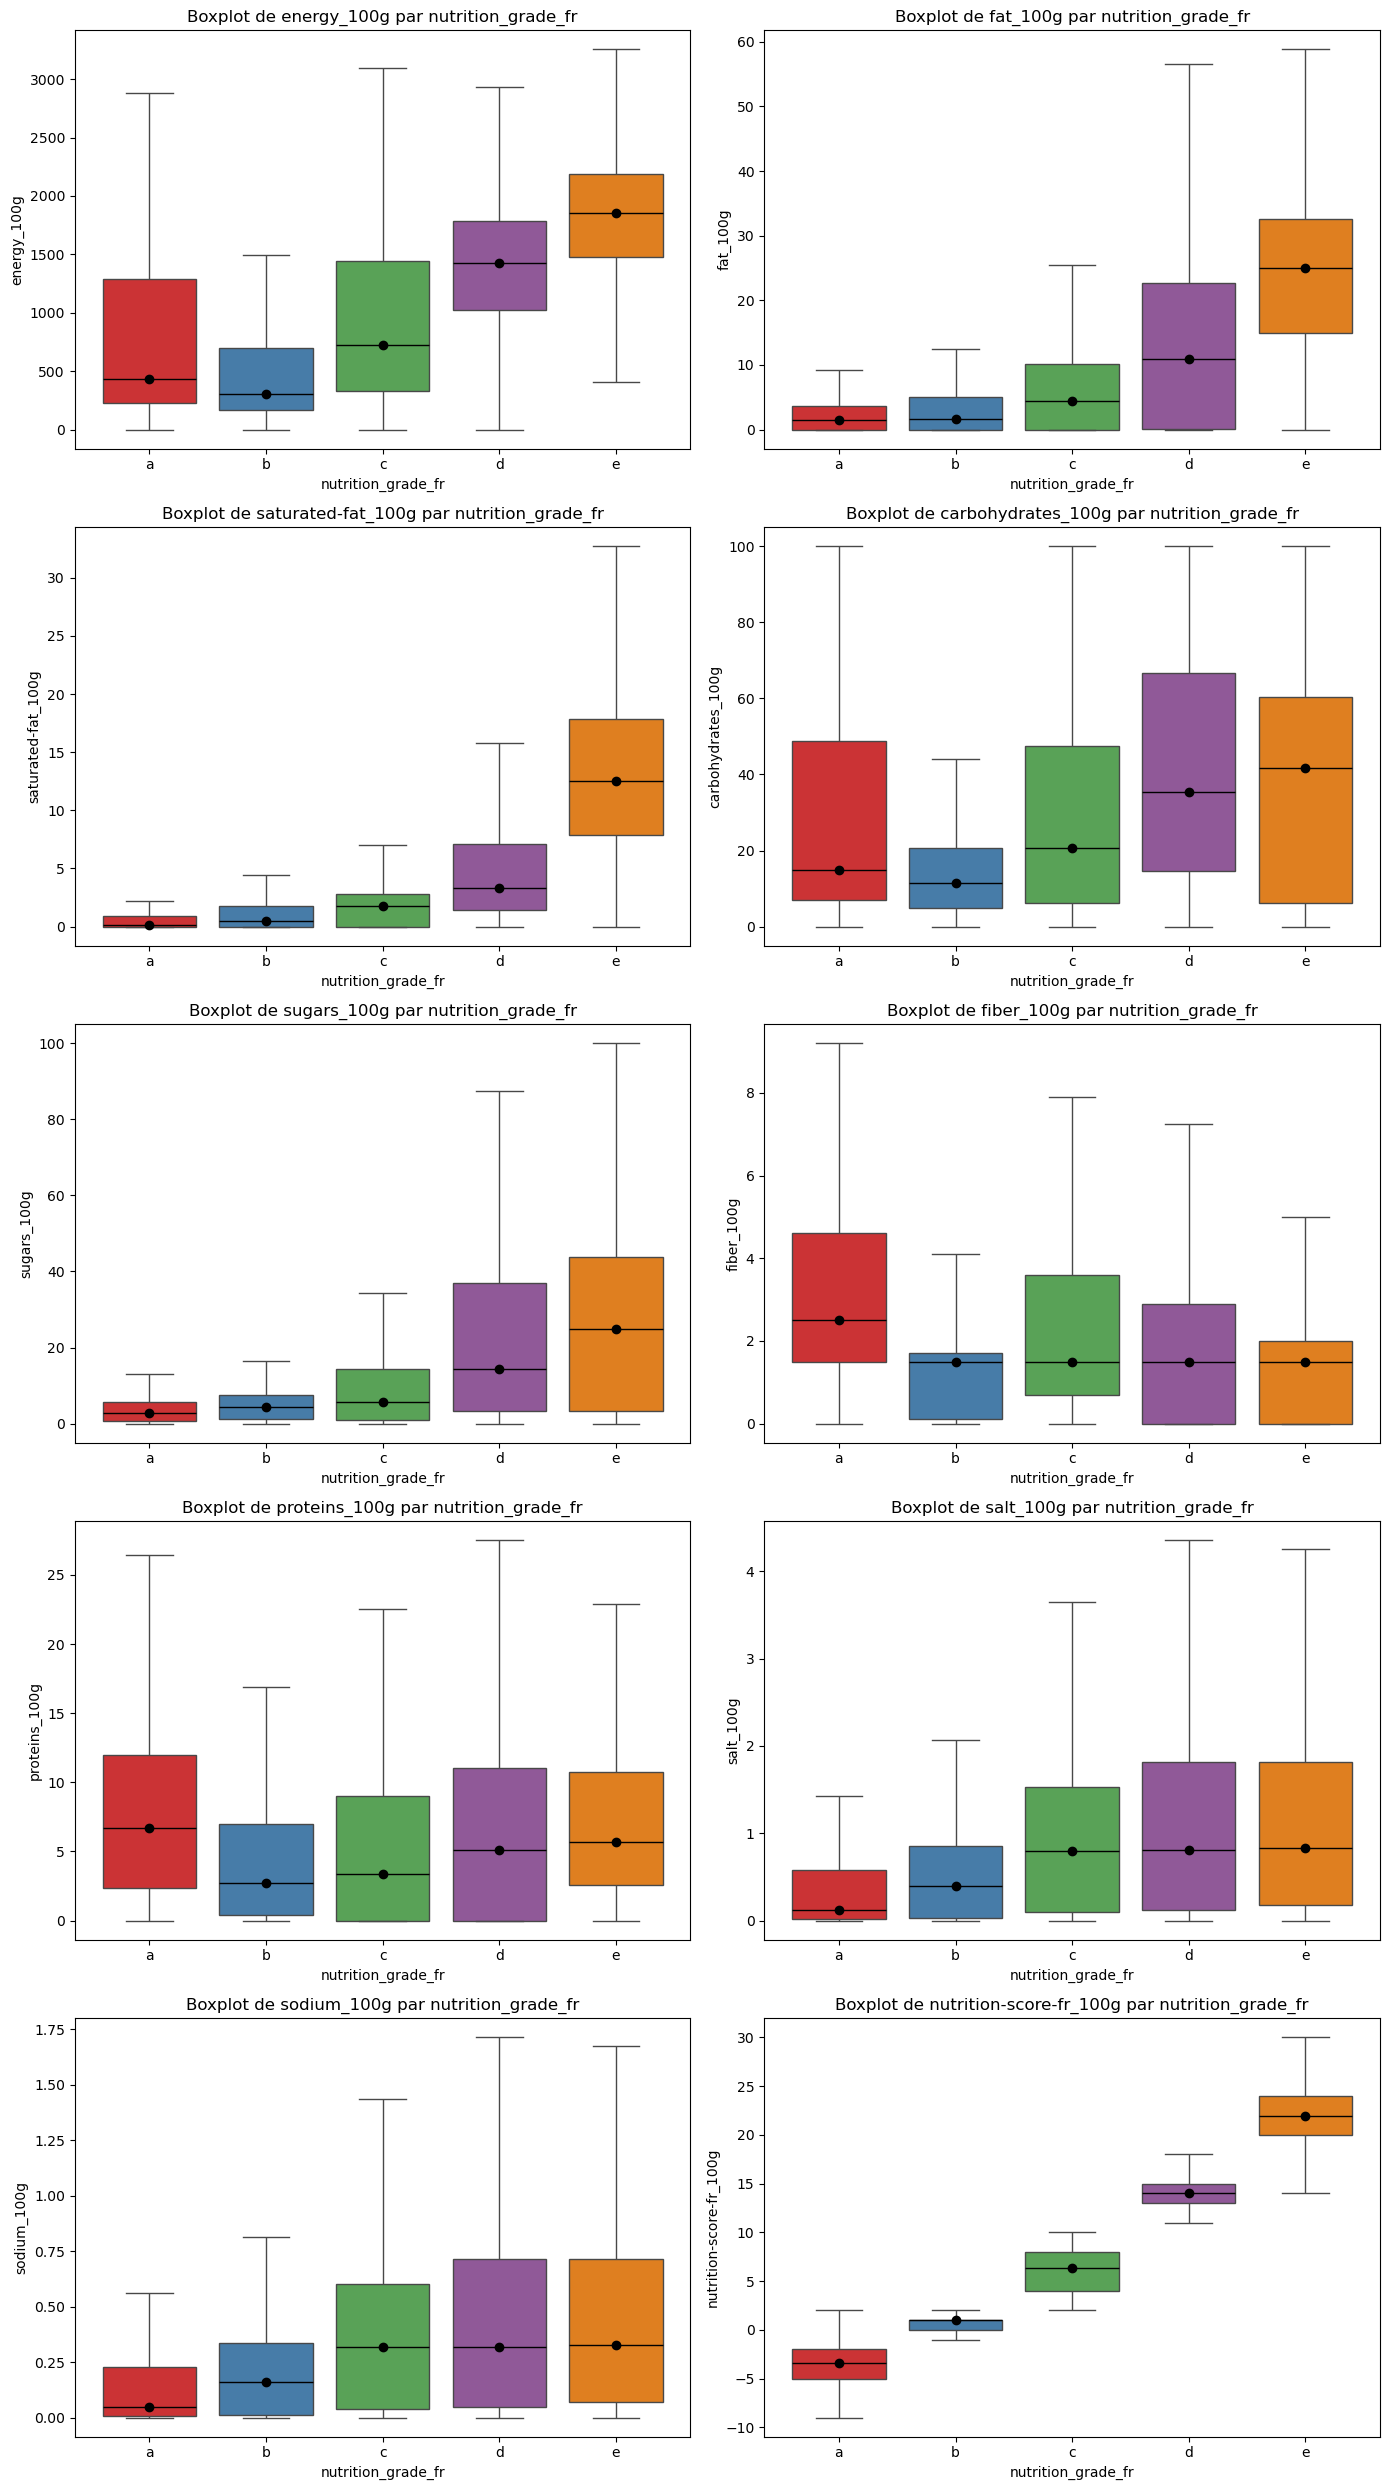

In [51]:
# Etude de la variance avec un test de Kruskal-Wallis
fcn.kruskal_wallis_test(df_final, data_quanti, "nutrition_grade_fr")

Le test de Kruskal-Wallis permet d'évaluer comment différentes variables quantitatives sont associées aux catégories de nutriscore, allant de A à E. 

Le test indique qu'il existe des différentes statistiquement significatives entre les médianes des différents nutriscores pour plusieurs variables. Cela signifie que ces variables contribuent à la classification des produits alimentaires dans les catégories de nutriscore A à E.

Les P-values sont toutes égales à 0, ce qui signifie que l'on peut rejeter l'hypothèse H0 et il y a donc bien une corrélation entre nos variables.

L'Eta-squared (η²) est une mesure de la taille de l'effet utilisée dans les analyses de variance pour indiquer quelle proportion de la variance totale dans les données est expliquée par le facteur à l'étude. Pour interpréter les valeurs de l'Eta-squared, on utilise généralement les seuils suivants pour indiquer des tailles d'effet faible, moyenne ou forte :

Faible effet : η² = 0.01
Effet moyen : η² = 0.06
Fort effet : η² = 0.14

Les variables les plus corrélées avec le nutriscore sont :
<ul>
    <li>energy_100g (0.3421)</li>
    <li>fat_100g (0.2571)</li>
    <li>saturated-fat_100g (0.3968)</li>
    <li>sugars_100g (0.1967)</li>
</ul>
Les variables moyennement corrélées avec le nutriscore sont :
<ul>
    <li>carbohydrates_100g (0.0874)</li>
    <li>fiber_100g (0.0606)</li>
</ul>

Les autres variables sont faiblement corrélées avec le nutriscore.

Alors que les cercles de corrélation indiquent comment les variables sont liées entre elles et aux composantes principales, le test de Kruskall-Wallis avecc l'Eta squared montre l'importance de chaque variable dans la différenciation entre les nutriscores.

Les variables qui avaient une forte corrélation avec les composantes principales et qui présentent également un Eta squared élevé sont les principaux contributeurs aux différences entre les catégories de nutriscore.

<div style=" background-color: RGB(247, 227, 237); padding: 10px 10px;">
    <p>En croisant les informations de ces boîtes à moustache avec les cercles de corrélation des composantes principales, on peut affirmer que certaines variables, comme les graisses, les sucres et le sel, jouent un rôle significatif dans la classification des produits selon le nutriscore.</p>
    <p>Les variables qui montrent une forte corrélation avec les composantes principales et qui ont un Eta squared élevé sont particulièrement importantes pour comprendre ce qui influence le nutriscore d'un produit.</p>
</div>

<div style="background-color: RGB(25, 62, 144); text-align: center;" >
<h2 style="margin: auto; padding: 20px; color: white">Partie 5 - Conclusion</h2>
</div>

L'analyse approfondie du jeu de données d'Open Food Facts, réalisée dans le cadre de ce projet, révèle plusieurs insights pertinents qui nous permettent d'évaluer la faisabilité de la mise en place d'un système de suggestion ou d'auto-complétion pour optimiser le remplissage des informations nutritionnelles par les utilisateurs.

<span style="font-weight: bold; text-decoration: underline;">1. Identification des défis</span>
Le principal défi identifié est la gestion des valeurs manquantes et des entrées erronées qui sont courantes dans la base de données actuelle. Plus de 50% des entrées dans certaines variables importantes sont incomplètes, ce qui peut compromettre la qualité des analyses nutritionnelles proposées aux utilisateurs.

<span style="font-weight: bold; text-decoration: underline;">2. Solutions potentielles</span>
L'analyse a permis de développer plusieurs méthodes de traitement des données manquantes, notamment l'imputation médiane pour les données nutritionnelles et l'utilisation d'algorithmes de KNN (K-Nearest Neighbors) pour estimer les grades nutritionnels absents. Ces méthodes ont montré une efficacité prometteuse dans la simulation de données complètes, ce qui pourrait être intégré dans le système d'auto-complétion pour améliorer la précision des entrées des utilisateurs.

<span style="font-weight: bold; text-decoration: underline;">3. Viabilité technique</span>
Techniquement, le déploiement d'un tel système est viable. Les tests statistiques ont confirmé que les imputations réalisées ne modifient pas significativement la distribution des variables, ce qui assure que les suggestions faites aux utilisateurs restent fiables et valides. De plus, l'utilisation d'une ACP (Analyse en Composantes Principales) pour réduire la dimensionnalité des données a permis une meilleure compréhension et une segmentation efficace des variables influentes.

<span style="font-weight: bold; text-decoration: underline;">4. Recommandations</span>
Pour mener à bien ce projet, il est recommandé de :
<ul>
    <li>Poursuivre le développement des algorithmes de suggestion avec une phase de tests plus étendue pour calibrer précisément les méthodes d'imputation ;</li>
    <li>Intégrer des sessions de formation pour les utilisateurs sur l'utilisation du système de suggestion poiur maximiser son efficacité ;</li>
    <li>Effectuer des audits réguliers post-déploiement pour surveiller et optimiser la performance du système.</li>
</ul>

En conclusion, la création d'un système d'auto-complétion pour la base de données Open Food Facts est non seulement faisable mais également bénéfique pour augmenter la qualité et la fiabilité des données recueillies. Ce projet aligne les objectifs de Santé publique France avec les besoins des utilisateurs, facilitant ainsi une meilleure éducation nutritionnelle et une prise de décision informée sur les produits alimentaires.